# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

# Objective 
1. Using the dataset , find what are factors that impact a car price less or more expensive.
2. Build and evaluate multiple regression model to predict the car price.
3. Provide the insights from the model findings, how the features relate to a car less or more expensive. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Exploratory Data Analysis (EDA)

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures,OrdinalEncoder
from scipy import stats
from scipy.stats import boxcox, yeojohnson

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

In [262]:
data = pd.read_csv('data/vehicles.csv')
data.sample(10)

id                   region  price    year manufacturer  \
335198  7307950915             philadelphia      0  2013.0        honda   
414367  7311520192        eastern panhandle   5990  2001.0       nissan   
265889  7315575559               binghamton   5900  2012.0       nissan   
122047  7316218046                  atlanta  31995  2020.0    chevrolet   
339653  7311456504  scranton / wilkes-barre  39990  2016.0          NaN   
399356  7315810700               winchester  32990  2018.0          ram   
258642  7304610791             south jersey   6895  2011.0     infiniti   
19030   7305679603                jonesboro  38590  2018.0      lincoln   
151129  7304102235               fort wayne  26590  2018.0          bmw   
142808  7314074893                  chicago   3300  2012.0         jeep   

                               model  condition    cylinders    fuel  \
335198                         civic        NaN          NaN     gas   
414367                 xterra se 4x4  excellent  6 cylinders     gas   
265889                  rogue sl awd       good          NaN     gas   
122047             express cargo van        NaN  6 cylinders     gas   
339653        Blue Bird All American       good  6 cylinders  diesel   
399356  1500 quad cab harvest pickup       good  6 cylinders     gas   
258642                     g37 sedan       good  6 cylinders     gas   
19030            continental reserve       good          NaN   other   
151129    3 series 330i xdrive sedan       good          NaN     gas   
142808                       liberty        NaN          NaN     gas   

        odometer title_status transmission                VIN drive  \
335198   94822.0        clean    automatic  19XFB2F58DE228974   NaN   
414367  116000.0        clean    automatic  5N1ED28Y21C560825   4wd   
265889  119534.0        clean    automatic                NaN   NaN   
122047   40435.0        clean    automatic  1GCWGBFP1L1139056   rwd   
339653   65368.0        clean    automatic  1BAKDCPA3GF313137   rwd   
399356   29979.0        clean        other  1C6RR7GG9JS229010   4wd   
258642  115818.0        clean    automatic  JN1CV6AR0BM351052   4wd   
19030    21570.0        clean        other  1LN6L9RP6J5610328   fwd   
151129   19980.0        clean    automatic  WBA8D9G58JNU72204   NaN   
142808       1.0        clean    automatic  1C4PJMCK8CW106486   4wd   

             size    type paint_color state  
335198    compact   sedan       black    pa  
414367  full-size     SUV      silver    wv  
265889        NaN     SUV       black    ny  
122047        NaN     van       white    ga  
339653        NaN     bus       white    pa  
399356        NaN  pickup       black    va  
258642        NaN   sedan      silver    nj  
19030         NaN   sedan       black    ar  
151129        NaN   sedan       black    in  
142808        NaN     SUV       white    il

In [263]:
# Display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [264]:
# Display descriptive statistics
data.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [265]:
#checking for missing values
data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


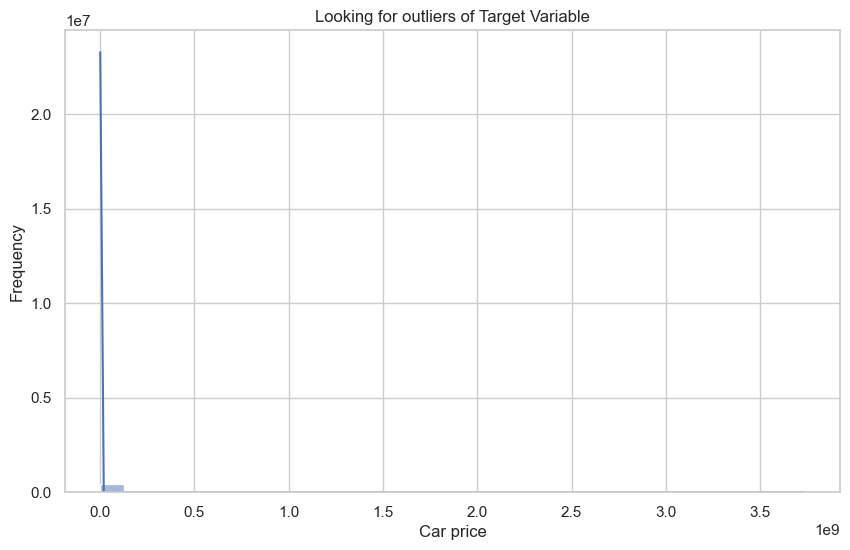

<Figure size 640x480 with 0 Axes>

In [266]:
#visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['price'],bins=30,kde=True)
plt.title('Looking for outliers of Target Variable')
plt.xlabel('Car price')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/data_outliers.png')

# Because we see a lot of outliers had to use the quantile to get the outliers

In [267]:
#Calculate IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [268]:
# Filter out outiers 
data_no_outliers = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


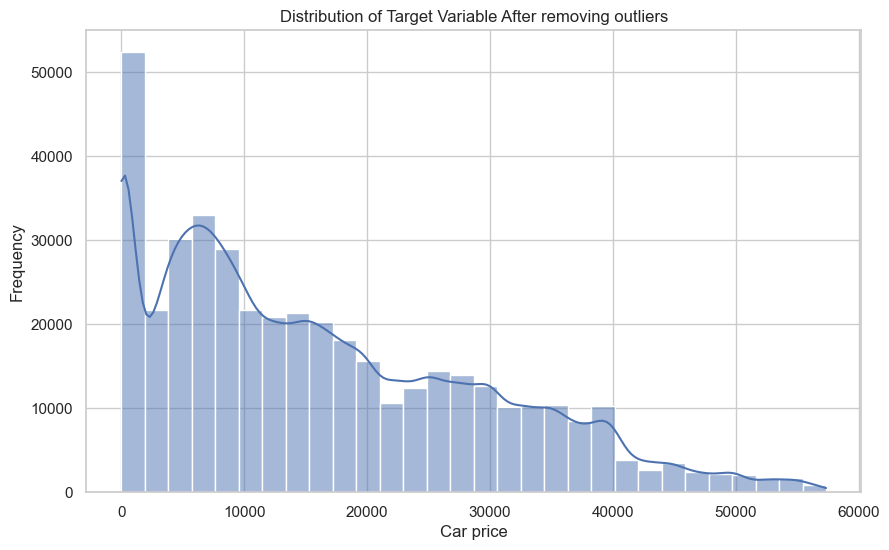

<Figure size 640x480 with 0 Axes>

In [269]:
#visualize the distribution of the target variable after outliers
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['price'],bins=30,kde=True)
plt.title('Distribution of Target Variable After removing outliers')
plt.xlabel('Car price')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/data_histogram_outliers.png')

C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

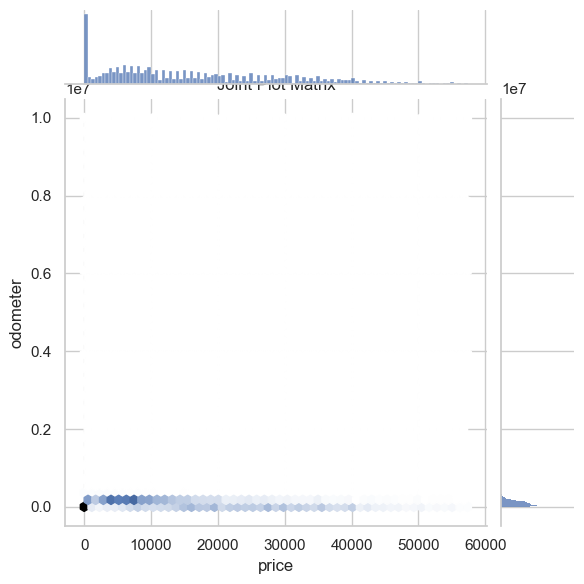

<Figure size 640x480 with 0 Axes>

In [270]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.jointplot(data = data_no_outliers , x = 'price', y = 'odometer', kind = 'hex')
plt.title('Joint Plot Matrix')
plt.show()
plt.savefig('images/data_corrlerations.png')

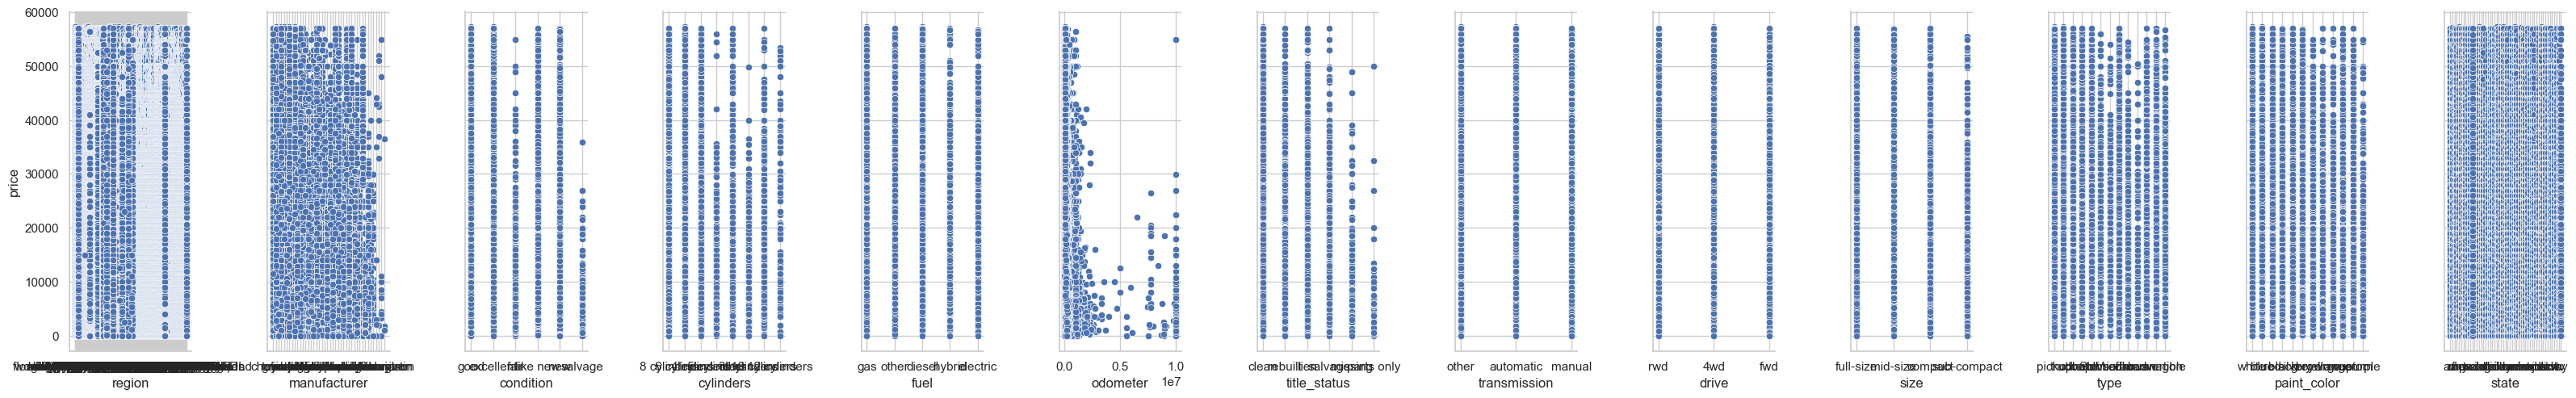

<Figure size 640x480 with 0 Axes>

In [272]:
# Visualize relationships between features and target
sns.pairplot(data_no_outliers, x_vars=data_no_outliers[['region', 'manufacturer', 
                       'condition', 'cylinders', 'fuel','odometer','title_status','transmission',
                                'drive','size','type','paint_color','state']], y_vars='price', height=5, aspect=0.5)
plt.show()
plt.savefig('images/data_pairplot.png')

# As the data above is not good and needs additional cleaning better visualizses will be shown in after data cleaning.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [273]:
data_no_outliers.sample(10)

id            region  price    year   manufacturer  \
19799   7312280003       little rock  13000  2015.0            NaN   
276659  7315369361     new york city   2995  2005.0           jeep   
424350  7309929451         milwaukee  16490  2012.0            gmc   
265657  7302699776            albany   8990  2010.0            kia   
182556  7310234343         baltimore   2500  2008.0      chevrolet   
188236  7313460418            boston     99  2004.0  mercedes-benz   
147728  7314850575      st louis, MO  10933  2012.0          honda   
73857   7311820781  colorado springs      0  2017.0          buick   
330210  7314505070         lancaster   9990  2012.0         toyota   
223762  7314312029          billings      0  2017.0            gmc   

                 model  condition    cylinders    fuel  odometer title_status  \
19799       scion fr-s       good  4 cylinders     gas   20000.0      rebuilt   
276659  grand cherokee        NaN          NaN     gas  161744.0        clean   
424350          canyon  excellent          NaN     gas   36683.0        clean   
265657       sedona ex  excellent  6 cylinders     gas   92645.0        clean   
182556          impala        NaN  6 cylinders     gas  118330.0        clean   
188236        sl-class        NaN          NaN     gas   82836.0        clean   
147728           pilot  excellent  6 cylinders     gas  208044.0        clean   
73857           encore        NaN          NaN     gas   77091.0        clean   
330210        camry se        NaN          NaN     gas  129710.0        clean   
223762     sierra 2500        NaN  8 cylinders  diesel  120521.0        clean   

       transmission                VIN drive       size         type  \
19799        manual                NaN   rwd        NaN          NaN   
276659    automatic  1J8HR58265C590165   4wd        NaN          SUV   
424350    automatic  1GTE5MF9XC8146917   NaN        NaN       pickup   
265657    automatic  KNDMH4C34A6341231   fwd   mid-size     mini-van   
182556        other  2G1WT58N481298432   fwd        NaN        sedan   
188236    automatic  WDBSK75F74F081296   rwd  full-size  convertible   
147728    automatic  5FNYF4H56CB001796   4wd  full-size          SUV   
73857     automatic  KL4CJESB6HB054404   NaN        NaN          SUV   
330210    automatic                NaN   NaN        NaN          NaN   
223762    automatic  1GT12TEY6HF181886   4wd        NaN        truck   

       paint_color state  
19799          NaN    ar  
276659       green    ny  
424350        blue    wi  
265657        grey    ny  
182556       black    md  
188236      silver    ma  
147728       black    il  
73857       silver    co  
330210         NaN    pa  
223762         NaN    mt

# dropping the columns that are not required

In [274]:
data_no_outliers = data_no_outliers.drop(['id','region','cylinders','title_status','VIN','drive','paint_color','state','model'], axis = 1)
data_no_outliers.sample(10)

price    year   manufacturer  condition    fuel  odometer  \
121590  19500  2017.0         subaru  excellent     gas   76230.0   
11474   17950  2007.0  mercedes-benz        NaN     gas   88859.0   
149178  43990  2016.0      chevrolet       good     gas   45542.0   
373969  22900  2011.0      chevrolet   like new  diesel    1000.0   
413523  19999  2005.0      chevrolet        NaN  diesel  292652.0   
334499   6000  2010.0     volkswagen       good     gas  109519.0   
19707   24995  2009.0      chevrolet        NaN     gas  131986.0   
420912  30590  2017.0          acura       good   other   44651.0   
321147  21990  2003.0           ford        NaN     gas   38138.0   
92173   26700  2013.0      chevrolet  excellent     gas   52279.0   

       transmission       size       type  
121590    automatic   mid-size  hatchback  
11474     automatic        NaN      sedan  
149178    automatic        NaN        NaN  
373969    automatic        NaN     pickup  
413523    automatic        NaN      truck  
334499    automatic   mid-size      sedan  
19707     automatic        NaN     pickup  
420912        other        NaN      other  
321147    automatic        NaN     pickup  
92173     automatic  full-size     pickup

# filling the NAN using the MICE or Mode

In [275]:
data_no_outliers.isnull().sum()

price                0
year              1012
manufacturer     16805
condition       168843
fuel              2966
odometer          4322
transmission      2489
size            299639
type             91061
dtype: int64

In [276]:
#data['Native Country'].fillna(data['Native Country'].mode(), inplace=True)
# data_no_outliers_copy = data_no_outliers.copy()
# missing_mask = data_no_outliers_copy.isna()
# imputer = IterativeImputer(max_iter=10, random_state=0)
# imputed_values = imputer.fit_transform(data_no_outliers_copy)
# data_no_outliers_copy[missing_mask] = imputed_values[missing_mask]

In [277]:
data_no_outliers['year'] = data_no_outliers['year'].fillna(data_no_outliers['year'].mode()[0])

In [278]:
data_no_outliers['manufacturer'] = data_no_outliers['manufacturer'].fillna(data_no_outliers['manufacturer'].mode()[0])

In [279]:
data_no_outliers['condition'] = data_no_outliers['condition'].fillna(data_no_outliers['condition'].mode()[0])

In [280]:
data_no_outliers['fuel'] = data_no_outliers['fuel'].fillna(data_no_outliers['fuel'].mode()[0])

In [281]:
data_no_outliers['odometer'] = data_no_outliers['odometer'].fillna(data_no_outliers['odometer'].mode()[0])

In [282]:
data_no_outliers['transmission'] = data_no_outliers['transmission'].fillna(data_no_outliers['transmission'].mode()[0])

In [283]:
data_no_outliers['size'] = data_no_outliers['size'].fillna(data_no_outliers['size'].mode()[0])

In [284]:
data_no_outliers['type'] = data_no_outliers['type'].fillna(data_no_outliers['type'].mode()[0])

In [285]:
data_no_outliers.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
fuel            0
odometer        0
transmission    0
size            0
type            0
dtype: int64

In [286]:
data_no_outliers.sample(10)

price    year manufacturer  condition    fuel  odometer transmission  \
314335      0  2018.0        volvo       good     gas   24459.0    automatic   
307724  18590  2018.0      hyundai       good     gas   20890.0        other   
137293   3995  2001.0        buick       good     gas   94164.0    automatic   
365890  24990  2018.0       subaru       good   other   33098.0        other   
401890  15000  2014.0         ford       good  diesel   61468.0       manual   
348102      0  2017.0       nissan       good  diesel   74588.0    automatic   
380572  36989  2018.0         ford  excellent     gas   35040.0    automatic   
233532   7299  2005.0       toyota  excellent     gas   99696.0    automatic   
87306   52590  2019.0          bmw       good   other   18933.0        other   
270829  21900  2016.0        volvo  excellent     gas   64569.0    automatic   

             size       type  
314335  full-size      sedan  
307724  full-size      sedan  
137293  full-size      sedan  
365890  full-size      sedan  
401890    compact  hatchback  
348102  full-size      truck  
380572  full-size     pickup  
233532  full-size      sedan  
87306   full-size      other  
270829  full-size      wagon

# Replacing the price == 0 with nan and then filling that nan with mode.

In [287]:
data_no_outliers['price'] = data_no_outliers['price'].replace(0, np.nan)

In [288]:
data_no_outliers['price'] = data_no_outliers['price'].fillna(data_no_outliers['price'].mode()[0])

In [289]:
data_no_outliers.sample(10)

price    year manufacturer  condition    fuel  odometer  \
409153   6995.0  2015.0     infiniti       good     gas   47648.0   
340488   7295.0  2011.0         ford  excellent     gas  124000.0   
150235  19999.0  1958.0      mercury  excellent     gas   65373.0   
53364    3900.0  2008.0         ford  excellent     gas  147000.0   
30489   11800.0  2014.0        lexus   like new  hybrid  150000.0   
119777   4400.0  2009.0         ford  excellent     gas  177300.0   
224513  11977.0  2009.0    chevrolet       good     gas  164774.0   
116486   5900.0  2010.0      mercury       good     gas  112290.0   
354467   9990.0  2010.0     cadillac       good     gas  127199.0   
248983  21995.0  2016.0          bmw  excellent     gas  100000.0   

       transmission       size       type  
409153    automatic  full-size      sedan  
340488    automatic   mid-size      sedan  
150235       manual  full-size      sedan  
53364        manual  full-size      sedan  
30489     automatic   mid-size  hatchback  
119777    automatic   mid-size        SUV  
224513    automatic  full-size      truck  
116486    automatic  full-size        SUV  
354467    automatic  full-size      wagon  
248983    automatic  full-size      sedan

# Normalization using log

In [290]:
# Calculate skewness
price_skew = data_no_outliers['price'].skew()

In [291]:
#replacing the zero rows for price with nan to get the normalization
# data_no_outliers['price_nans'] = data_no_outliers['price'].replace(0, np.nan)
# print('number of zeros in price columns ->', data_no_outliers[data_no_outliers['price']==0]['price'].count())
# print('number of zeros in price_nans columns ->', data_no_outliers[data_no_outliers['price_nans']==0]['price_nans'].count())
# print('number of nans in price_nans columns ->', data_no_outliers['price_nans'].isna().sum())

In [292]:
# Applying Log Transformation
data_no_outliers['Log_Price'] = np.log1p(data_no_outliers['price'])
print(f"Skewness after Log Transformation: {data_no_outliers['Log_Price'].skew():.5f}")

Skewness after Log Transformation: -2.74263


In [293]:
# data_no_outliers['Log_Price'] = data_no_outliers['Log_Price'].replace(np.nan, 0)
# print(data_no_outliers['Log_Price'].skew())
# sns.displot(data_no_outliers['Log_Price'], bins=30,kde=True)

In [294]:
#Applying Box-Cox Transformation after checking all values are positive
if (data_no_outliers['price'] > 0).all():
    data_no_outliers['BoxCox_Price'], _ = boxcox(data_no_outliers['price'])
else:
    # Consider alternative transformations or handling strategies
    print("Not all SalePrice values are positive. Consider using Yeo-Johnson or handling negative values.")
print(f"Skewness after Box-Cox Transformation: {data_no_outliers['BoxCox_Price'].skew():.5f}")

Skewness after Box-Cox Transformation: -0.07699


In [295]:
# Applying Quantile Transformation to follow a normal distribution
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
data_no_outliers['Quantile_Price'] = quantile_transformer.fit_transform(data_no_outliers['price'].values.reshape(-1, 1)).flatten()
print(f"Skewness after Quantile Transformation: {data_no_outliers['Quantile_Price'].skew():.5f}")

Skewness after Quantile Transformation: -0.45344


In [296]:
# Applying Yeo-Johnson Transformation
data_no_outliers['YeoJohnson_Price'], _ = yeojohnson(data_no_outliers['price'])
print(f"Skewness after Yeo-Johnson Transformation: {data_no_outliers['YeoJohnson_Price'].skew():.5f}")

Skewness after Yeo-Johnson Transformation: -0.07432


In [297]:
# Applying Square Root Transformation
data_no_outliers['Sqrt_SalePrice'] = np.sqrt(data_no_outliers['price'])
print(f"Skewness after Square Root Transformation: {data_no_outliers['Sqrt_SalePrice'].skew():.5f}")

Skewness after Square Root Transformation: 0.13029


C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

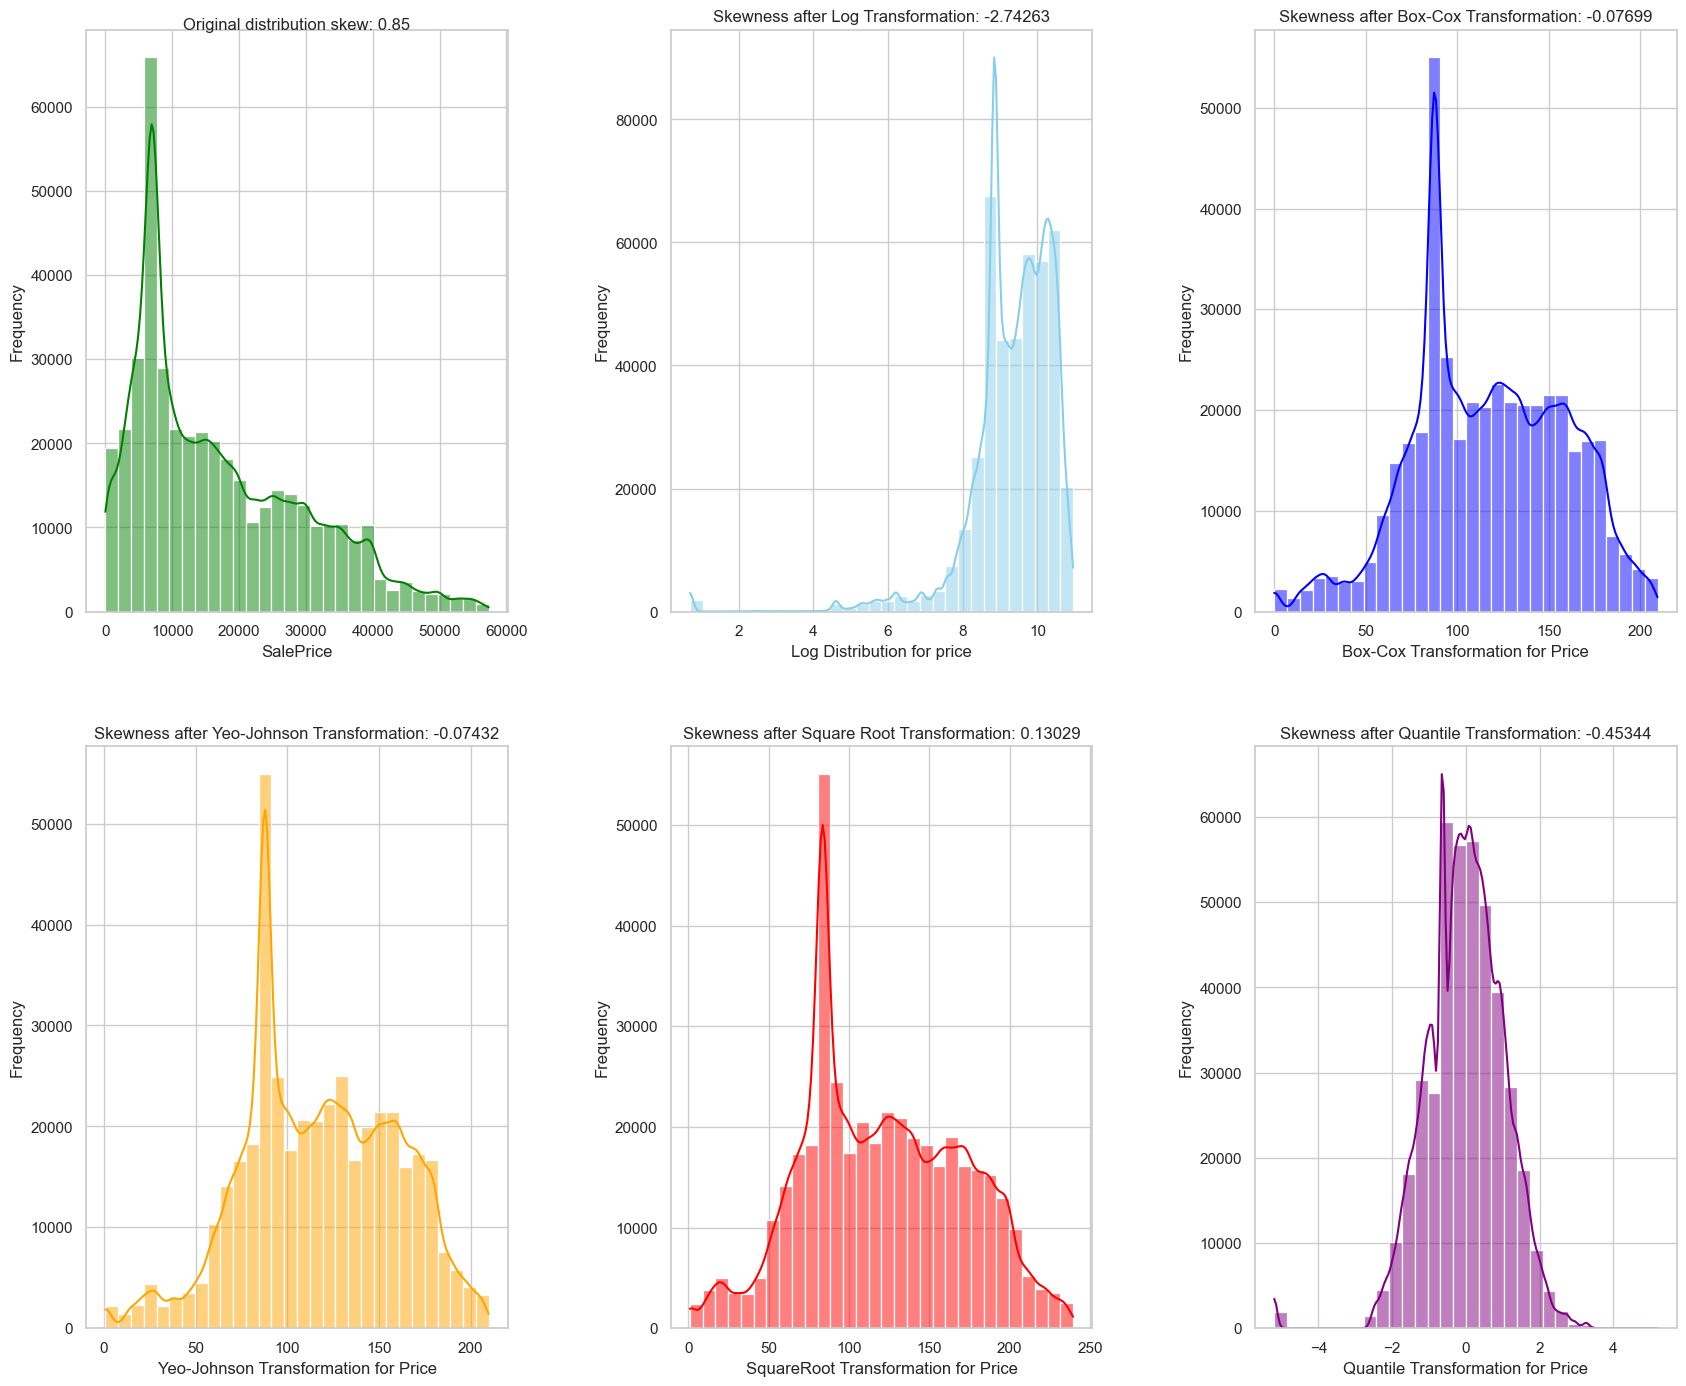

<Figure size 640x480 with 0 Axes>

In [298]:
# Plotting the distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
 
# Flatten the axes array for easier indexing
axes = axes.flatten()
 
#Log Distribution
sns.histplot(data_no_outliers['Log_Price'], kde=True, bins=30, color='skyblue', ax=axes[1])
axes[1].set_title(f"Skewness after Log Transformation: {data_no_outliers['Log_Price'].skew():.5f}")
axes[1].set_xlabel('Log Distribution for price')
axes[1].set_ylabel('Frequency')
 
# Box-Cox Transformation for Price
sns.histplot(data_no_outliers['BoxCox_Price'], kde=True, bins=30, color='blue', ax=axes[2])
axes[2].set_title(f"Skewness after Box-Cox Transformation: {data_no_outliers['BoxCox_Price'].skew():.5f}")
axes[2].set_xlabel('Box-Cox Transformation for Price')
axes[2].set_ylabel('Frequency')
 
# Yeo-Johnson Transformation for Price
sns.histplot(data_no_outliers['YeoJohnson_Price'], kde=True, bins=30, color='orange', ax=axes[3])
axes[3].set_title(f"Skewness after Yeo-Johnson Transformation: {data_no_outliers['YeoJohnson_Price'].skew():.5f}")
axes[3].set_xlabel('Yeo-Johnson Transformation for Price')
axes[3].set_ylabel('Frequency')

# SquareRoot Transformation for Price
sns.histplot(data_no_outliers['Sqrt_SalePrice'], kde=True, bins=30, color='red', ax=axes[4])
axes[4].set_title(f"Skewness after Square Root Transformation: {data_no_outliers['Sqrt_SalePrice'].skew():.5f}")
axes[4].set_xlabel('SquareRoot Transformation for Price')
axes[4].set_ylabel('Frequency')

# Quantile Transformation for Price
sns.histplot(data_no_outliers['Quantile_Price'], kde=True, bins=30, color='purple', ax=axes[5])
axes[5].set_title(f"Skewness after Quantile Transformation: {data_no_outliers['Quantile_Price'].skew():.5f}")
axes[5].set_xlabel('Quantile Transformation for Price')
axes[5].set_ylabel('Frequency')

sns.histplot(data_no_outliers['price'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title(f'Original distribution skew: {price_skew:.2f}', transform=axes[0].transAxes)
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')


plt.tight_layout(pad=4.0)
plt.show()
plt.savefig('images/transformation distributions.png')

In [299]:
# Import the Kolmogorov-Smirnov Test from scipy.stats
from scipy.stats import kstest
 
# Run the KS tests for the 5 cases
transformations = ["Log_Price", "BoxCox_Price", "YeoJohnson_Price",
                    "Sqrt_SalePrice", "Quantile_Price",]
 
# Standardizing the transformations before performing KS test
ks_test_results = {}
for transformation in transformations:
    standardized_data = (data_no_outliers[transformation] - data_no_outliers[transformation].mean()) / data_no_outliers[transformation].std()
    ks_stat, ks_p_value = kstest(standardized_data, 'norm')
    ks_test_results[transformation] = (ks_stat, ks_p_value)
 
# Convert results to DataFrame for easier comparison
ks_test_results_df = pd.DataFrame.from_dict(ks_test_results, orient='index', columns=['KS Statistic', 'P-Value'])
print(ks_test_results_df.round(5))

                  KS Statistic  P-Value
Log_Price              0.12200      0.0
BoxCox_Price           0.07251      0.0
YeoJohnson_Price       0.07264      0.0
Sqrt_SalePrice         0.08368      0.0
Quantile_Price         0.05476      0.0


<h3> I need to revisit the above values as it shows the p-value for the trnasformation as zero but the modeling had no impact. </h3>

In [300]:
data_no_outliers.sample(10)

price    year manufacturer  condition   fuel  odometer transmission  \
151900   3000.0  2003.0      pontiac       good    gas  166000.0    automatic   
93342    3450.0  2010.0    chevrolet       good    gas  145706.0    automatic   
280318   7495.0  2011.0          kia  excellent    gas   66000.0    automatic   
12510    6995.0  1996.0    chevrolet       good  other   80798.0    automatic   
345906  10500.0  1997.0         jeep  excellent    gas  175345.0       manual   
182141  29990.0  2017.0       nissan       good    gas   69871.0    automatic   
90535   27990.0  2015.0         audi       good    gas   35035.0        other   
43674   16590.0  2009.0     infiniti       good    gas   81993.0        other   
13668   39590.0  2020.0         ford       good    gas    1419.0        other   
90945   23991.0  2013.0          bmw       good    gas   78065.0    automatic   

             size       type  Log_Price  BoxCox_Price  Quantile_Price  \
151900    compact  hatchback   8.006701     61.362451       -1.467860   
93342   full-size        SUV   8.146419     65.095559       -1.407115   
280318  full-size      sedan   8.922125     90.161157       -0.462610   
12510   full-size      sedan   8.853094     87.596440       -0.634851   
345906  full-size      sedan   9.259226    103.773882       -0.184203   
182141  full-size      wagon  10.308653    160.337313        0.931971   
90535   full-size      other  10.239638    155.830895        0.819656   
43674   full-size      other   9.716616    125.496855        0.196979   
13668   full-size      coupe  10.586357    179.804953        1.545927   
90945   full-size      sedan  10.085476    146.209950        0.588560   

        YeoJohnson_Price  Sqrt_SalePrice  
151900         61.451836       54.772256  
93342          65.191015       58.736701  
280318         90.301745       86.573668  
12510          87.732128       83.636117  
345906        103.941315      102.469508  
182141        160.627400      173.176211  
90535         156.110692      167.302122  
43674         125.709556      128.802174  
13668         180.140325      198.972360  
90945         146.468041      154.890284

In [301]:
data_no_outliers = data_no_outliers.drop(['Log_Price','BoxCox_Price','Quantile_Price','YeoJohnson_Price'], axis =1)
data_no_outliers.sample(10)

price    year manufacturer  condition    fuel  odometer  \
112002  10990.0  2014.0    chevrolet       good   other   89565.0   
250077   3250.0  1991.0         ford       good  diesel  121502.0   
207690  12900.0  2014.0    chevrolet  excellent     gas  115000.0   
212278  21500.0  2002.0         ford   like new     gas   14000.0   
306476  14995.0  2012.0       nissan  excellent     gas  154697.0   
295256  19550.0  2012.0         ford       good     gas  140257.0   
153108  11995.0  2008.0    chevrolet  excellent     gas  164320.0   
127511  17999.0  2017.0         ford       good     gas   71450.0   
323335    785.0  2019.0    chevrolet       good  diesel   81503.0   
231061  16488.0  2017.0         mini       good     gas   53809.0   

       transmission       size   type  Sqrt_SalePrice  
112002    automatic  full-size  sedan      104.833201  
250077    automatic  full-size  sedan       57.008771  
207690    automatic  full-size  sedan      113.578167  
212278    automatic  full-size  sedan      146.628783  
306476    automatic  full-size    SUV      122.454073  
295256    automatic  full-size  sedan      139.821315  
153108    automatic  full-size  truck      109.521687  
127511    automatic  full-size    SUV      134.160352  
323335    automatic  full-size  truck       28.017851  
231061    automatic  full-size  other      128.405607

In [302]:
# Convert year to integer instead of float
data_no_outliers['year'] = data_no_outliers['year'].astype('int64')
data_no_outliers.sample(10)

price  year manufacturer  condition    fuel  odometer transmission  \
382068  19900.0  2010         ford       good  diesel  164700.0    automatic   
318816    489.0  2020         jeep       good     gas   11080.0    automatic   
62115   21990.0  2016        mazda       good     gas   16345.0        other   
175636  30590.0  2020         ford       good     gas   10740.0        other   
124799  27590.0  2016        lexus       good     gas   19064.0    automatic   
184607  24999.0  2011          ram       good     gas   52717.0    automatic   
95072   29990.0  2019         ford       good     gas   13628.0        other   
193606   7995.0  2010        volvo       good     gas  143000.0    automatic   
309921   6995.0  2020          gmc  excellent     gas   18076.0    automatic   
56192   13200.0  2014       toyota  excellent     gas   94000.0    automatic   

             size       type  Sqrt_SalePrice  
382068  full-size      truck      141.067360  
318816  full-size        SUV       22.113344  
62115   full-size  hatchback      148.290256  
175636  full-size     pickup      174.899971  
124799  full-size  hatchback      166.102378  
184607  full-size     pickup      158.110721  
95072   full-size     pickup      173.176211  
193606  full-size      sedan       89.414764  
309921  full-size      truck       83.636117  
56192    mid-size  hatchback      114.891253

# Feature Engineering performing Oridinal encoder method to change the categorical features

In [303]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418703 entries, 0 to 426879
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           418703 non-null  float64
 1   year            418703 non-null  int64  
 2   manufacturer    418703 non-null  object 
 3   condition       418703 non-null  object 
 4   fuel            418703 non-null  object 
 5   odometer        418703 non-null  float64
 6   transmission    418703 non-null  object 
 7   size            418703 non-null  object 
 8   type            418703 non-null  object 
 9   Sqrt_SalePrice  418703 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 35.1+ MB


In [304]:
data_no_outliers.manufacturer.unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat',
       'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun',
       'ferrari', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [305]:
data_no_outliers.condition.unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [306]:
data_no_outliers.fuel.unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [307]:
data_no_outliers.transmission.unique()

array(['automatic', 'other', 'manual'], dtype=object)

In [308]:
data_no_outliers.type.unique()

array(['sedan', 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'offroad', 'bus', 'van', 'convertible', 'wagon'],
      dtype=object)

In [309]:
# size (compact, full-size,mid-size,sub-compact)
data_no_outliers.size.unique()

AttributeError: 'int' object has no attribute 'unique'

In [310]:
oe = OrdinalEncoder(categories = [['good', 'excellent', 'fair', 'like new', 'new', 'salvage']])
data_no_outliers['condition_coder'] = oe.fit_transform(data_no_outliers[['condition']])

In [311]:
data_no_outliers.sample(10)

price  year manufacturer  condition fuel  odometer transmission  \
138496  10500.0  2016       subaru  excellent  gas   98000.0    automatic   
54995   24499.0  2011       toyota       good  gas   85483.0    automatic   
410602  10986.0  2017      hyundai       good  gas   82196.0    automatic   
86410    6500.0  1963     cadillac       good  gas  105000.0    automatic   
4188    10999.0  2013   volkswagen  excellent  gas   68110.0    automatic   
313348  16965.0  2006          gmc  excellent  gas  100000.0    automatic   
410836  25487.0  2019      hyundai       good  gas   29240.0        other   
351943   2500.0  1956         ford       fair  gas  100000.0    automatic   
76569   11750.0  2005          gmc       good  gas  192778.0    automatic   
10119   12999.0  1998    chevrolet  excellent  gas   77796.0    automatic   

             size       type  Sqrt_SalePrice  condition_coder  
138496  full-size      sedan      102.469508              1.0  
54995   full-size     pickup      156.521564              0.0  
410602  full-size      sedan      104.814121              0.0  
86410   full-size      sedan       80.622577              0.0  
4188     mid-size      sedan      104.876117              1.0  
313348  full-size     pickup      130.249760              1.0  
410836  full-size  hatchback      159.646484              0.0  
351943  full-size      sedan       50.000000              2.0  
76569   full-size      sedan      108.397417              0.0  
10119   full-size      coupe      114.013157              1.0

In [312]:
data_no_outliers = data_no_outliers.drop(columns = 'condition')
data_no_outliers.sample(10)

price  year manufacturer    fuel  odometer transmission       size  \
425441  31995.0  2015          gmc     gas   71080.0    automatic  full-size   
6025    14995.0  2014        honda     gas  133774.0    automatic  full-size   
124085   2000.0  2013        mazda     gas  119000.0    automatic  full-size   
320402   6995.0  2017          ram  diesel   59989.0    automatic  full-size   
201094   6173.0  2014     chrysler     gas  133791.0    automatic  full-size   
26724    5999.0  2009       subaru     gas  162000.0    automatic  full-size   
358839   3000.0  2010         ford     gas  235000.0    automatic  full-size   
355924  30850.0  2016       toyota     gas  110069.0    automatic  full-size   
367072  36885.0  2015         ford  diesel  103588.0    automatic  full-size   
154919  18800.0  2015          gmc     gas   54521.0    automatic  full-size   

         type  Sqrt_SalePrice  condition_coder  
425441  sedan      178.871462              0.0  
6025      SUV      122.454073              0.0  
124085  sedan       44.721360              0.0  
320402  truck       83.636117              0.0  
201094  sedan       78.568442              3.0  
26724   sedan       77.453212              1.0  
358839  sedan       54.772256              2.0  
355924  sedan      175.641681              0.0  
367072  sedan      192.054680              0.0  
154919    SUV      137.113092              1.0

In [313]:
oe = OrdinalEncoder(categories = [['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat',
       'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun',
       'ferrari', 'aston-martin', 'land rover', 'morgan']])
data_no_outliers['manufacturer_coder'] = oe.fit_transform(data_no_outliers[['manufacturer']])

In [314]:
data_no_outliers.sample(10)

price  year   manufacturer    fuel  odometer transmission  \
408365  51999.0  2018           ford     gas   32684.0    automatic   
239529  33989.0  2011  mercedes-benz     gas   87488.0    automatic   
20994   38590.0  2011      chevrolet     gas   30237.0        other   
194615  11271.0  2014      chevrolet     gas  124001.0    automatic   
334201  20990.0  2010            ram     gas  121850.0    automatic   
226586  32405.0  2018           jeep     gas   53249.0    automatic   
264649  27590.0  2019         toyota  hybrid   11876.0        other   
372979  35590.0  2019            gmc     gas    8218.0        other   
376583  35990.0  2020       cadillac     gas   14215.0        other   
285988  34990.0  2016           ford  diesel  130525.0    automatic   

             size    type  Sqrt_SalePrice  condition_coder  manufacturer_coder  
408365  full-size   truck      228.032892              0.0                 0.0  
239529  full-size   sedan      184.361059              0.0                23.0  
20994   full-size   other      196.443376              0.0                 2.0  
194615    compact   sedan      106.164966              3.0                 2.0  
334201  full-size   truck      144.879260              0.0                 6.0  
226586  full-size     SUV      180.013888              1.0                 4.0  
264649  full-size     SUV      166.102378              0.0                 3.0  
372979  full-size  pickup      188.653121              0.0                 1.0  
376583  full-size   sedan      189.710305              0.0                 8.0  
285988  full-size  pickup      187.056141              1.0                 0.0

In [315]:
data_no_outliers = data_no_outliers.drop(columns = 'manufacturer')
data_no_outliers.sample(10)

price  year    fuel  odometer transmission       size      type  \
338678   5500.0  2011     gas  163540.0    automatic  full-size     sedan   
58744    7700.0  2011     gas       0.0    automatic  full-size     sedan   
242044  44990.0  2012  diesel   52307.0    automatic  full-size     truck   
276252  20990.0  2018     gas   61066.0        other  full-size     wagon   
21434    6995.0  2019     gas   20827.0    automatic  full-size   offroad   
157457  14489.0  2015     gas  102528.0    automatic  full-size       SUV   
25481   29999.0  2011     gas   84000.0    automatic  full-size     sedan   
411572   7880.0  2013     gas  142757.0    automatic  full-size     sedan   
186663   5900.0  2014     gas  160000.0    automatic  full-size  mini-van   
188057    169.0  2017     gas   64500.0    automatic  full-size     sedan   

        Sqrt_SalePrice  condition_coder  manufacturer_coder  
338678       74.161985              1.0                 5.0  
58744        87.749644              1.0                 9.0  
242044      212.108463              0.0                 0.0  
276252      144.879260              0.0                 6.0  
21434        83.636117              1.0                 4.0  
157457      120.370262              0.0                 1.0  
25481       173.202194              0.0                 8.0  
411572       88.769364              0.0                 2.0  
186663       76.811457              0.0                10.0  
188057       13.000000              0.0                 5.0

In [316]:
oe = OrdinalEncoder(categories = [['gas', 'other', 'diesel', 'hybrid', 'electric']])
data_no_outliers['fuel_coder'] = oe.fit_transform(data_no_outliers[['fuel']])

In [317]:
data_no_outliers.sample(10)

price  year    fuel  odometer transmission       size   type  \
226946  33998.0  2015     gas   94730.0    automatic  full-size  truck   
227295  10250.0  1968     gas   40000.0       manual  full-size  truck   
251962  22990.0  2014     gas   53050.0    automatic  full-size  sedan   
138232    618.0  2018  diesel   26910.0    automatic  full-size  sedan   
197393    958.0  2021     gas       0.0    automatic  full-size    SUV   
78872   11980.0  2015     gas   76246.0    automatic  full-size  sedan   
60767    6995.0  2021     gas    1258.0    automatic  full-size  sedan   
11494    3499.0  2011     gas       1.0    automatic  full-size  sedan   
108830   5000.0  2015     gas  130000.0    automatic  full-size  sedan   
56437   34900.0  2012     gas       0.0    automatic  full-size  sedan   

        Sqrt_SalePrice  condition_coder  manufacturer_coder  fuel_coder  
226946      184.385466              0.0                 2.0         0.0  
227295      101.242284              0.0                 0.0         0.0  
251962      151.624536              0.0                11.0         0.0  
138232       24.859606              0.0                 6.0         2.0  
197393       30.951575              1.0                 8.0         0.0  
78872       109.453186              0.0                 5.0         0.0  
60767        83.636117              0.0                 9.0         0.0  
11494        59.152346              0.0                10.0         0.0  
108830       70.710678              1.0                 0.0         0.0  
56437       186.815417              1.0                33.0         0.0

In [318]:
data_no_outliers = data_no_outliers.drop(columns = 'fuel')
data_no_outliers.sample(10)

price  year  odometer transmission       size   type  \
263793   4450.0  2002  114000.0    automatic  full-size    van   
342926  40590.0  2013   57384.0        other  full-size  coupe   
361955  38963.0  2015  141942.0    automatic  full-size  sedan   
420210  20950.0  2012  178111.0    automatic  full-size  truck   
370119  46900.0  2013  174204.0    automatic  full-size  sedan   
376379  24759.0  2018   29698.0    automatic  full-size    SUV   
402811   6995.0  2007  185742.0    automatic  full-size    SUV   
123423   6995.0  2009       1.0    automatic  full-size  sedan   
158599  11900.0  2008  192337.0    automatic  full-size  truck   
373723  50100.0  2018    8977.0    automatic    compact  other   

        Sqrt_SalePrice  condition_coder  manufacturer_coder  fuel_coder  
263793       66.708320              1.0                14.0         0.0  
342926      201.469601              0.0                 8.0         1.0  
361955      197.390476              0.0                 0.0         2.0  
420210      144.741148              0.0                 1.0         0.0  
370119      216.564078              0.0                 0.0         2.0  
376379      157.349929              0.0                22.0         0.0  
402811       83.636117              0.0                 2.0         1.0  
123423       83.636117              0.0                24.0         0.0  
158599      109.087121              0.0                 0.0         2.0  
373723      223.830293              0.0                 2.0         1.0

In [319]:
oe = OrdinalEncoder(categories = [['automatic', 'other', 'manual']])
data_no_outliers['transmission_coder'] = oe.fit_transform(data_no_outliers[['transmission']])

In [320]:
data_no_outliers.sample(10)

price  year  odometer transmission       size       type  \
235483   4995.0  2013  176635.0    automatic    compact  hatchback   
344579   5450.0  2011     200.0    automatic  full-size      sedan   
171168  29990.0  2017   22947.0        other  full-size      other   
603      3450.0  1997  172295.0    automatic  full-size      sedan   
202998  49990.0  2018   57062.0    automatic  full-size      truck   
202159  10995.0  2009  137000.0    automatic  full-size        SUV   
60213   13999.0  2016  124887.0    automatic  full-size      sedan   
228149  22998.0  2019   18610.0    automatic  full-size        SUV   
267448  13931.0  2016   31933.0    automatic  full-size      sedan   
399960   6695.0  2011  175000.0    automatic  full-size      wagon   

        Sqrt_SalePrice  condition_coder  manufacturer_coder  fuel_coder  \
235483       70.675314              0.0                28.0         0.0   
344579       73.824115              1.0                18.0         0.0   
171168      173.176211              0.0                 4.0         0.0   
603          58.736701              0.0                 9.0         0.0   
202998      223.584436              0.0                 3.0         0.0   
202159      104.857046              1.0                 5.0         0.0   
60213       118.317370              0.0                 3.0         1.0   
228149      151.650915              0.0                 4.0         0.0   
267448      118.029657              0.0                28.0         0.0   
399960       81.822980              1.0                20.0         0.0   

        transmission_coder  
235483                 0.0  
344579                 0.0  
171168                 1.0  
603                    0.0  
202998                 0.0  
202159                 0.0  
60213                  0.0  
228149                 0.0  
267448                 0.0  
399960                 0.0

In [321]:
data_no_outliers = data_no_outliers.drop(columns = 'transmission')
data_no_outliers.sample(10)

price  year  odometer       size    type  Sqrt_SalePrice  \
244691   7500.0  1966     100.0  full-size   sedan       86.602540   
285604   8875.0  2001  148584.0  full-size   sedan       94.207218   
370848   5495.0  2007  231850.0  full-size     SUV       74.128267   
64805      90.0  2010  126466.0  full-size   sedan        9.486833   
100716   4799.0  2001   76000.0  full-size   sedan       69.274815   
373381  26990.0  2016   73371.0  full-size  pickup      164.286335   
311009  20000.0  2010  143493.0  full-size   sedan      141.421356   
197998   6900.0  2011  214000.0  full-size   sedan       83.066239   
386392   9000.0  1999  107000.0    compact     SUV       94.868330   
117876   4000.0  2012  178000.0   mid-size   sedan       63.245553   

        condition_coder  manufacturer_coder  fuel_coder  transmission_coder  
244691              0.0                 0.0         0.0                 2.0  
285604              0.0                 0.0         0.0                 0.0  
370848              1.0                 9.0         0.0                 0.0  
64805               0.0                 9.0         0.0                 0.0  
100716              3.0                 8.0         0.0                 0.0  
373381              0.0                 2.0         0.0                 1.0  
311009              0.0                 4.0         0.0                 0.0  
197998              0.0                 0.0         0.0                 0.0  
386392              0.0                 0.0         0.0                 0.0  
117876              1.0                 5.0         0.0                 0.0

In [322]:
oe = OrdinalEncoder(categories = [['compact', 'full-size', 'mid-size', 'sub-compact']])
data_no_outliers['size_coder'] = oe.fit_transform(data_no_outliers[['size']])

In [323]:
data_no_outliers.sample(10)

price  year  odometer       size    type  Sqrt_SalePrice  \
346127   3495.0  2003  164016.0   mid-size   wagon       59.118525   
385173   5900.0  2006  248000.0  full-size   sedan       76.811457   
107941  13500.0  2000   19482.0  full-size     SUV      116.189500   
49406    4000.0  2003  140000.0  full-size   sedan       63.245553   
174511  31990.0  2017   15498.0  full-size  pickup      178.857485   
187557   9000.0  2011   97000.0  full-size   sedan       94.868330   
93514   32750.0  2016   16686.0  full-size  pickup      180.969611   
383939  16000.0  2014  197746.0  full-size   truck      126.491106   
336747   3800.0  2008  117000.0   mid-size   sedan       61.644140   
184152  12995.0  2013  150757.0  full-size     SUV      113.995614   

        condition_coder  manufacturer_coder  fuel_coder  transmission_coder  \
346127              1.0                20.0         0.0                 0.0   
385173              0.0                 2.0         0.0                 0.0   
107941              0.0                 0.0         0.0                 0.0   
49406               0.0                13.0         0.0                 0.0   
174511              0.0                 6.0         0.0                 1.0   
187557              0.0                20.0         0.0                 0.0   
93514               0.0                 2.0         0.0                 0.0   
383939              3.0                 0.0         0.0                 0.0   
336747              0.0                 0.0         0.0                 0.0   
184152              0.0                 4.0         0.0                 0.0   

        size_coder  
346127         2.0  
385173         1.0  
107941         1.0  
49406          1.0  
174511         1.0  
187557         1.0  
93514          1.0  
383939         1.0  
336747         2.0  
184152         1.0

In [324]:
data_no_outliers = data_no_outliers.drop(columns = 'size')
data_no_outliers.sample(10)

price  year  odometer       type  Sqrt_SalePrice  condition_coder  \
410796  26987.0  2018   62667.0  hatchback      164.277205              0.0   
391392   6800.0  2010  119000.0   mini-van       82.462113              1.0   
198310    500.0  2017   36471.0      sedan       22.360680              0.0   
219324  18000.0  2016   54000.0      sedan      134.164079              0.0   
48917    9500.0  2010  117000.0      sedan       97.467943              1.0   
275562    249.0  2018   21995.0      coupe       15.779734              0.0   
305782  21900.0  2013  114593.0        SUV      147.986486              0.0   
270668  28990.0  2018   21943.0  hatchback      170.264500              0.0   
384053  15590.0  2016   41036.0  hatchback      124.859922              0.0   
411530  10999.0  2014  123920.0        SUV      104.876117              0.0   

        manufacturer_coder  fuel_coder  transmission_coder  size_coder  
410796                 7.0         0.0                 1.0         1.0  
391392                26.0         0.0                 0.0         1.0  
198310                 8.0         1.0                 0.0         1.0  
219324                22.0         0.0                 0.0         1.0  
48917                 15.0         0.0                 0.0         1.0  
275562                23.0         0.0                 0.0         1.0  
305782                 2.0         1.0                 0.0         1.0  
270668                19.0         1.0                 1.0         1.0  
384053                 0.0         1.0                 1.0         1.0  
411530                28.0         0.0                 0.0         1.0

In [325]:
oe = OrdinalEncoder(categories = [['sedan', 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'offroad', 'bus', 'van', 'convertible', 'wagon']])
data_no_outliers['type_coder'] = oe.fit_transform(data_no_outliers[['type']])

In [326]:
data_no_outliers.sample(10)

price  year  odometer    type  Sqrt_SalePrice  condition_coder  \
49155    7995.0  2012   80468.0   sedan       89.414764              0.0   
157666  11995.0  2015  128880.0   other      109.521687              0.0   
226670   5998.0  2008  156172.0   sedan       77.446756              0.0   
260935   6900.0  2013   92000.0   sedan       83.066239              0.0   
113530  17999.0  2016   98000.0     SUV      134.160352              3.0   
139787   4999.0  2005  114000.0   sedan       70.703607              0.0   
238874  28163.0  2018   35248.0     SUV      167.818354              0.0   
263200  18144.0  2015  146098.0  pickup      134.699666              0.0   
238426   6995.0  2012   87729.0   coupe       83.636117              1.0   
327311    435.0  2018   32721.0     SUV       20.856654              0.0   

        manufacturer_coder  fuel_coder  transmission_coder  size_coder  \
49155                 28.0         0.0                 0.0         1.0   
157666                 1.0         1.0                 0.0         1.0   
226670                 2.0         0.0                 0.0         1.0   
260935                 0.0         0.0                 0.0         1.0   
113530                 4.0         0.0                 0.0         1.0   
139787                 5.0         0.0                 0.0         2.0   
238874                19.0         0.0                 0.0         2.0   
263200                 5.0         0.0                 0.0         1.0   
238426                24.0         0.0                 0.0         0.0   
327311                20.0         0.0                 0.0         1.0   

        type_coder  
49155          0.0  
157666         3.0  
226670         0.0  
260935         0.0  
113530         5.0  
139787         0.0  
238874         5.0  
263200         1.0  
238426         4.0  
327311         5.0

In [327]:
data_no_outliers = data_no_outliers.drop(columns = 'type')
data_no_outliers.sample(10)

price  year  odometer  Sqrt_SalePrice  condition_coder  \
259753      1.0  2012  165000.0        1.000000              0.0   
104462  49900.0  2013    7660.0      223.383079              0.0   
107068   4995.0  2013  156000.0       70.675314              1.0   
54879    3800.0  2004  108000.0       61.644140              0.0   
2671    27990.0  2018   37332.0      167.302122              0.0   
67673   31990.0  2020    2408.0      178.857485              0.0   
165263  16900.0  2013  128000.0      130.000000              3.0   
147991   6995.0  2014   80000.0       83.636117              0.0   
336476  11500.0  2017   57027.0      107.238053              0.0   
78467   12995.0  2011  131168.0      113.995614              0.0   

        manufacturer_coder  fuel_coder  transmission_coder  size_coder  \
259753                 2.0         0.0                 0.0         1.0   
104462                 2.0         0.0                 2.0         1.0   
107068                 2.0         0.0                 0.0         1.0   
54879                 26.0         0.0                 0.0         0.0   
2671                   5.0         0.0                 1.0         1.0   
67673                  7.0         0.0                 1.0         1.0   
165263                 3.0         0.0                 0.0         1.0   
147991                 8.0         0.0                 0.0         1.0   
336476                22.0         0.0                 0.0         0.0   
78467                  3.0         0.0                 0.0         1.0   

        type_coder  
259753         0.0  
104462         4.0  
107068         0.0  
54879          0.0  
2671           1.0  
67673          3.0  
165263         5.0  
147991         0.0  
336476         0.0  
78467         12.0

# I would like to create 2 seperate dataset , one with original target variable 'price' and other with the normal distribution data after transformations that is ' sqrt_price'

In [328]:
data_price = data_no_outliers.drop(columns = 'Sqrt_SalePrice')
data_price.sample(10)

price  year  odometer  condition_coder  manufacturer_coder  \
321330  17995.0  2008  212980.0              1.0                 3.0   
338303  12990.0  2016   44294.0              0.0                 2.0   
227086  13777.0  2013  104339.0              0.0                24.0   
359172  22590.0  2012   99554.0              0.0                 2.0   
380891   7900.0  2015   92000.0              3.0                14.0   
67580    9200.0  1999  287000.0              0.0                 6.0   
346747   6995.0  2019  200038.0              3.0                 0.0   
31652   20000.0  2005  126000.0              0.0                 6.0   
8121     6995.0  2014   66592.0              0.0                 0.0   
205165   3900.0  2004  221389.0              0.0                 3.0   

        fuel_coder  transmission_coder  size_coder  type_coder  
321330         0.0                 0.0         2.0         5.0  
338303         0.0                 1.0         1.0         6.0  
227086         0.0                 0.0         1.0         5.0  
359172         1.0                 1.0         1.0         1.0  
380891         0.0                 0.0         2.0         0.0  
67580          2.0                 0.0         1.0         2.0  
346747         2.0                 0.0         1.0         2.0  
31652          0.0                 0.0         1.0         2.0  
8121           0.0                 0.0         1.0         5.0  
205165         0.0                 0.0         1.0         0.0

In [329]:
#examine Correlations :
highest_corr = data_price.corr()[['price']].nlargest(columns = 'price', n = 2).index[1]
print(highest_corr)

year


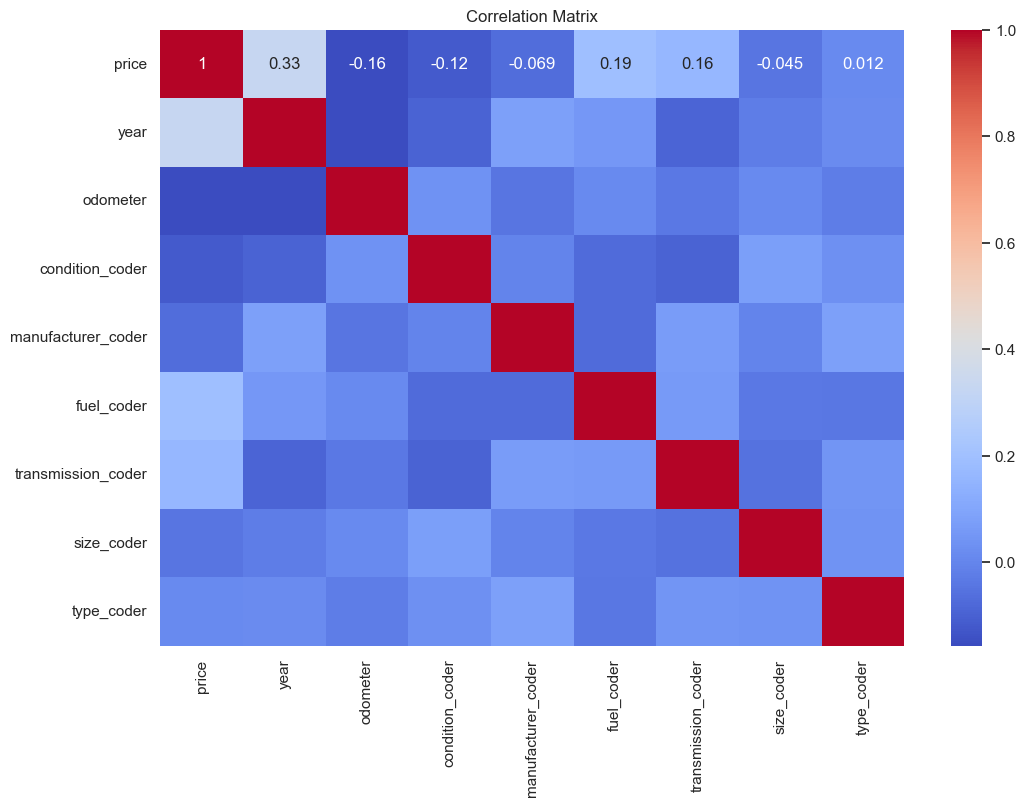

<Figure size 640x480 with 0 Axes>

In [330]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data_price.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('images/Correlation_matrix2.png')

In [331]:
data_sqrt_price = data_no_outliers.drop(columns = 'price')
data_sqrt_price.sample(10)

year  odometer  Sqrt_SalePrice  condition_coder  manufacturer_coder  \
53011   2007  156000.0       56.568542              0.0                 9.0   
297235  2004  196045.0       63.206012              0.0                 9.0   
420363  1998  134500.0       60.000000              0.0                 2.0   
175634  2016  113203.0      192.223828              0.0                 2.0   
177036  2013  107000.0       83.636117              0.0                22.0   
1086    2011   16796.0      188.653121              0.0                10.0   
54745   2019   45932.0      164.307638              0.0                20.0   
369864  2019   37696.0      162.397660              0.0                 6.0   
192949  2010  206864.0       54.662601              0.0                20.0   
419458  1988   57850.0       74.161985              0.0                 8.0   

        fuel_coder  transmission_coder  size_coder  type_coder  
53011          0.0                 0.0         1.0         0.0  
297235         0.0                 0.0         0.0         4.0  
420363         0.0                 0.0         1.0         2.0  
175634         2.0                 0.0         1.0         3.0  
177036         0.0                 0.0         1.0         0.0  
1086           0.0                 1.0         1.0         4.0  
54745          0.0                 0.0         1.0         3.0  
369864         0.0                 0.0         1.0         1.0  
192949         0.0                 0.0         1.0         0.0  
419458         0.0                 0.0         1.0         0.0

In [332]:
#examine Correlations :
highest_corr = data_sqrt_price.corr()[['Sqrt_SalePrice']].nlargest(columns = 'Sqrt_SalePrice', n = 2).index[1]
print(highest_corr)

year


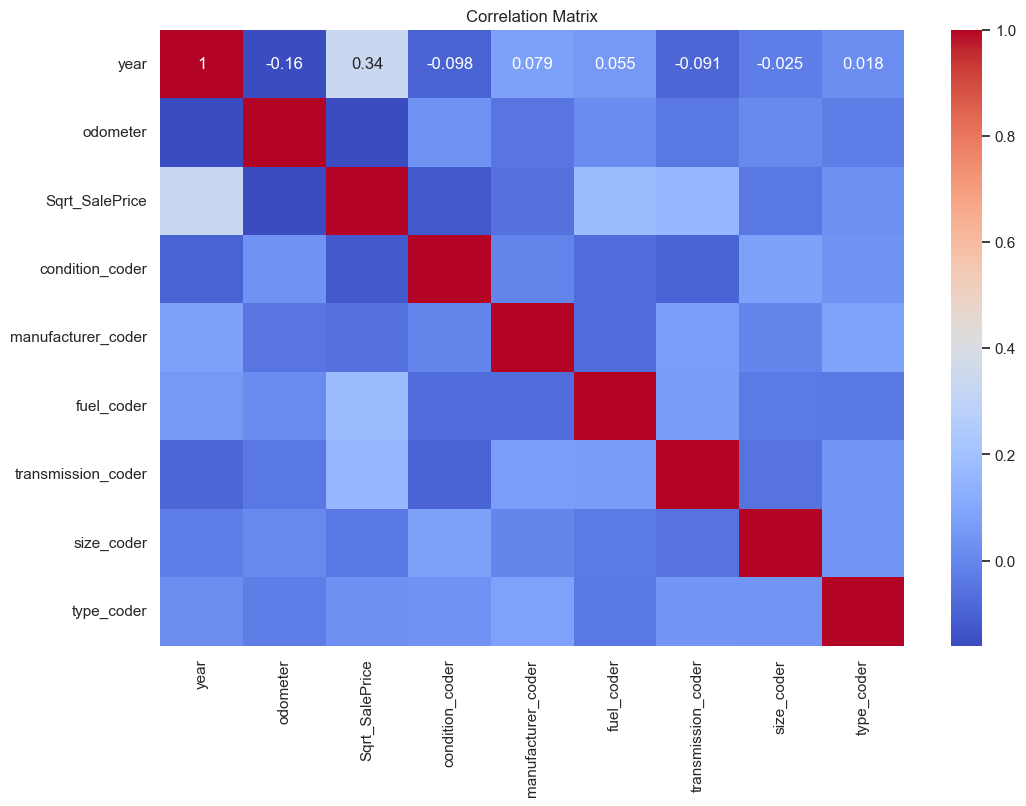

<Figure size 640x480 with 0 Axes>

In [333]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data_sqrt_price.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('images/Correlation_matrix2.png')

# As we also see the car price in the dataset are not logically accepted meaning started car price from 1 or going up 57341, i will keep the dataset by threshold from min = 5000 and max = 57341, this will remove some of the data.

In [334]:
data_no_outliers['price'].min()

1.0

In [335]:
data_no_outliers['price'].max()

57341.0

# Note : The value zero in the price column is replaced with nan and which inturn was replaced by mode in the above transformations to get a normal distribution.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# In the initial stage of model building , i will choose different models for both the target variable 'price' and transformed variable'sqrt' to compare the MSE and that give the better accuracy

Using the data_price & data_sqrt_price 

# Split dataset into train, test for data_price(original) dataset

In [336]:
X = data_price.drop('price', axis = 1)
y = data_price['price']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [338]:
# Linear Regression : 
linear_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('linear', LinearRegression())])

linear_pipe.fit(X_train, y_train)
linear_train_preds = linear_pipe.predict(X_train)
linear_test_preds = linear_pipe.predict(X_test)
linear_train_mse = mean_squared_error(y_train, linear_train_preds)
linear_test_mse = mean_squared_error(y_test, linear_test_preds)

print(f'Train MSE: {linear_train_mse}')
print(f'Test MSE: {linear_test_mse}')

linear_pipe

Train MSE: 127445983.28922513
Test MSE: 127301033.68616703


Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [339]:
# linear regression to extract the coeff : 
linear_model = LinearRegression().fit(X_train, y_train)
linear_coeff = linear_model.coef_

print(f'Coefficients: {linear_coeff}')

Coefficients: [ 4.35880922e+02 -6.18040015e-03 -8.59013813e+02 -1.36717939e+02
  2.90841780e+03  4.01882459e+03 -5.36580653e+02  4.61805791e+01]


In [340]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': linear_test_preds})
actual_vs_predicted_df_1.head()

Actual     Predicted
33513    4999.0  12516.926821
149283  37614.0  18598.989100
242958   6995.0  17534.218387
158461  14950.0  15050.076022
317616  27900.0  18341.133926

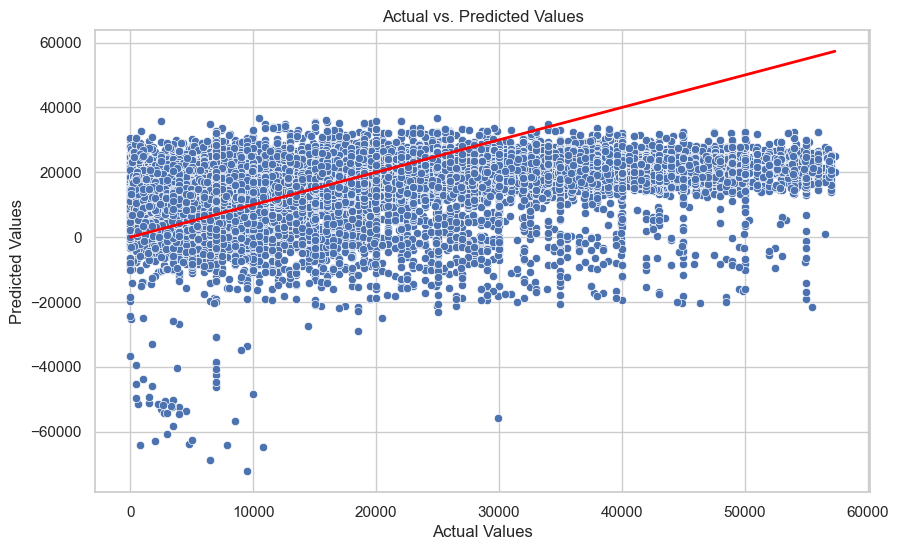

<Figure size 640x480 with 0 Axes>

In [341]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df_1)
plt.plot([actual_vs_predicted_df_1['Actual'].min(), actual_vs_predicted_df_1['Actual'].max()],
         [actual_vs_predicted_df_1['Actual'].min(), actual_vs_predicted_df_1['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
plt.savefig('images/Linear regression1.png')

# As above you an visualize that applying a linear regression on the skewed data for the car prices from 1.0 to 57341.0 is no where looking a accurate model , as the data is still scattered 

In [342]:
# Ridge Regression : 
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])

ridge_pipe.fit(X_train, y_train)
ridge_train_preds = ridge_pipe.predict(X_train)
ridge_test_preds = ridge_pipe.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')

ridge_pipe

Train MSE: 127445983.2895212
Test MSE: 127301033.46377443


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [343]:
# Ridge regression to extract the coeff : 
ridge_model = Ridge().fit(X_train, y_train)
ridge_coefs = ridge_model.coef_

print(f'Coefficients: {ridge_coefs}')

Coefficients: [ 4.35880743e+02 -6.18040479e-03 -8.59013603e+02 -1.36717863e+02
  2.90839906e+03  4.01878480e+03 -5.36573902e+02  4.61806684e+01]


In [344]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df_2 = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_test_preds})
actual_vs_predicted_df_2.head()

Actual     Predicted
33513    4999.0  12516.945620
149283  37614.0  18598.983996
242958   6995.0  17534.219902
158461  14950.0  15050.086264
317616  27900.0  18341.130348

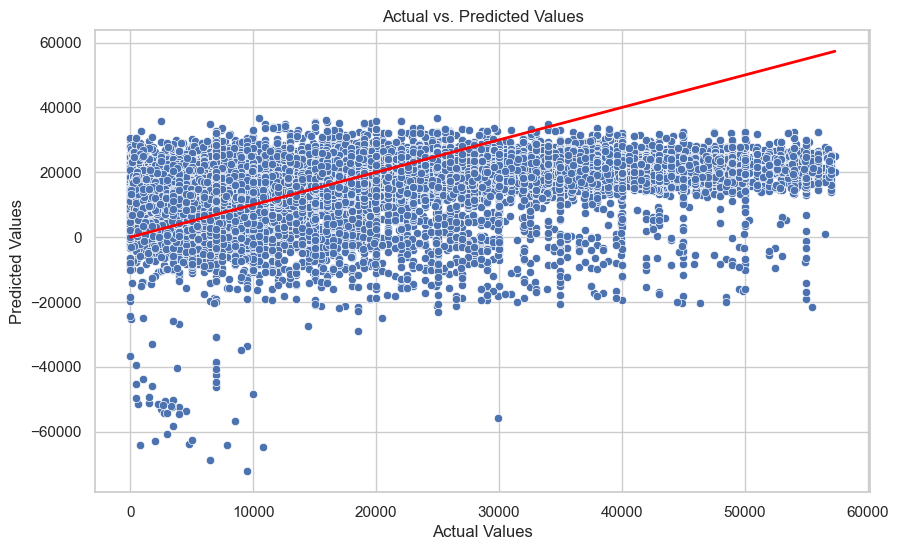

<Figure size 640x480 with 0 Axes>

In [345]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df_2)
plt.plot([actual_vs_predicted_df_2['Actual'].min(), actual_vs_predicted_df_2['Actual'].max()],
         [actual_vs_predicted_df_2['Actual'].min(), actual_vs_predicted_df_2['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
plt.savefig('images/ridgeregression1.png')

# As above you an visualize that applying a ridge regression on the skewed data for the car prices from 1.0 to 57341.0 is no where looking a accurate model , as the data is still scattered same as linear regression

In [346]:
# SFS with Lasso Regression : 
sequential_pipe = Pipeline([('selector', SequentialFeatureSelector(Lasso(), 
                                                                  n_features_to_select=4)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(X_train, y_train)
sequential_train_pred = sequential_pipe.predict(X_train)
sequential_test_pred = sequential_pipe.predict(X_test)
sequential_train_mse = mean_squared_error(y_train, sequential_train_pred)
sequential_test_mse = mean_squared_error(y_test, sequential_test_pred )


print(f'Train MSE: {sequential_train_mse}')
print(f'Test MSE: {sequential_test_mse}')

Train MSE: 129534790.51306257
Test MSE: 129691516.52107899


In [347]:
lasso_coefs = sequential_pipe.named_steps['linreg'].coef_

print(f'Coefficients: {lasso_coefs}')

Coefficients: [ 4.32776884e+02 -6.06042546e-03  3.12673335e+03  3.99372452e+03]


In [348]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df_3 = pd.DataFrame({'Actual': y_test, 'Predicted': sequential_test_pred})
actual_vs_predicted_df_3.head()

Actual     Predicted
33513    4999.0  15375.925722
149283  37614.0  17294.148896
242958   6995.0  18766.262249
158461  14950.0  17345.074651
317616  27900.0  17124.721739

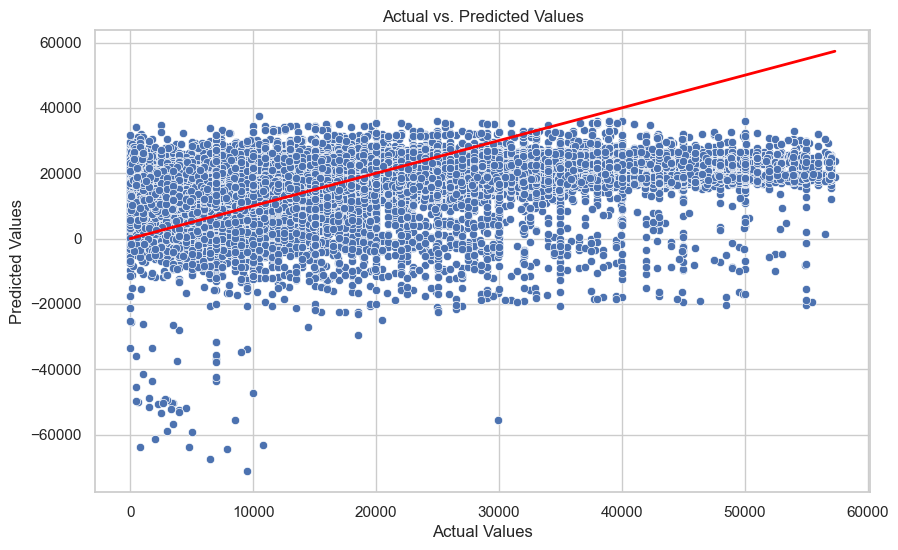

<Figure size 640x480 with 0 Axes>

In [349]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df_3)
plt.plot([actual_vs_predicted_df_3['Actual'].min(), actual_vs_predicted_df_3['Actual'].max()],
         [actual_vs_predicted_df_3['Actual'].min(), actual_vs_predicted_df_3['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
plt.savefig('images/SFS_Lasso1.png')

# As above you an visualize that applying a SFS with Lasso regression with n features as 4 also did not impove the model on the skewed data for the car prices from 1.0 to 57341.0 is no where looking a accurate model , as the data is still scattered same as linear and ridge. Also the mean is increased with SFS LASSO when compared to Linear and Ridge.

# I would like to try the normal distribution data from the above which is the sqrt_price dataset.

In [350]:
X1 = data_sqrt_price.drop('Sqrt_SalePrice', axis = 1)
y1 = data_sqrt_price['Sqrt_SalePrice']

In [351]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42)

In [352]:
# Linear Regression : 
linear_pipe1 = Pipeline([('scaler', StandardScaler()), 
                      ('linear', LinearRegression())])

linear_pipe1.fit(X1_train, y1_train)
linear_train_preds1 = linear_pipe1.predict(X1_train)
linear_test_preds1 = linear_pipe1.predict(X1_test)
linear_train_mse1 = mean_squared_error(y1_train, linear_train_preds1)
linear_test_mse1 = mean_squared_error(y1_test, linear_test_preds1)

print(f'Train MSE: {linear_train_mse1}')
print(f'Test MSE: {linear_test_mse1}')

linear_pipe1

Train MSE: 1994.1588887195865
Test MSE: 1994.518643110496


Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [353]:
# linear regression to extract the coeff : 
linear_model1 = LinearRegression().fit(X1_train, y1_train)
linear_coeff1 = linear_model1.coef_

print(f'Coefficients: {linear_coeff1}')

Coefficients: [ 1.74070959e+00 -2.49968650e-05 -3.64574020e+00 -5.01299087e-01
  1.05613058e+01  1.55589324e+01 -1.53240604e+00  4.45331080e-01]


In [354]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df_sqrt1 = pd.DataFrame({'Actual': y1_test, 'Predicted': linear_test_preds1})
actual_vs_predicted_df_sqrt1.head()

Actual   Predicted
33513    70.703607  103.438599
149283  193.943291  126.657519
242958   83.636117  124.351775
158461  122.270193  113.388460
317616  167.032931  125.947055

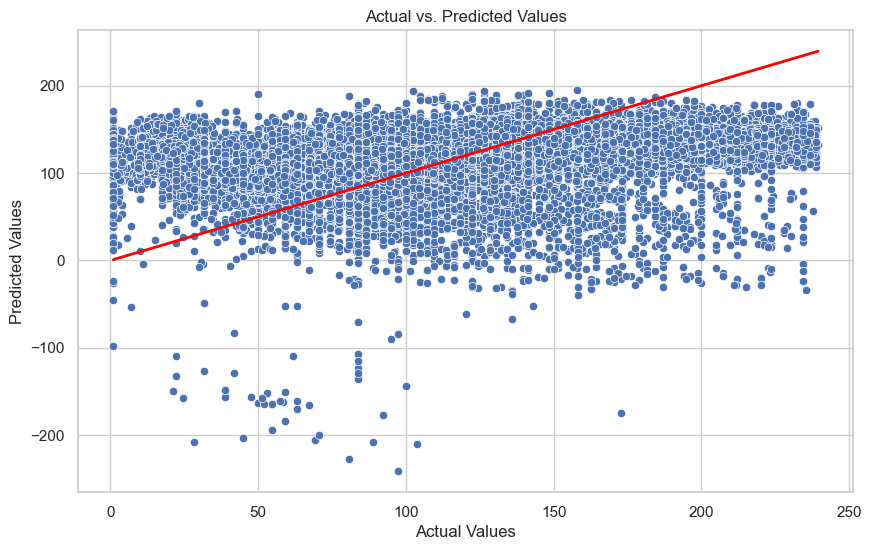

<Figure size 640x480 with 0 Axes>

In [355]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df_sqrt1)
plt.plot([actual_vs_predicted_df_sqrt1['Actual'].min(), actual_vs_predicted_df_sqrt1['Actual'].max()],
         [actual_vs_predicted_df_sqrt1['Actual'].min(), actual_vs_predicted_df_sqrt1['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
plt.savefig('images/linearregression2.png')

# Even after using the sqrt values did not help in the model accuracy, for the linear regersssion

In [356]:
# Ridge Regression : 
ridge_pipe1 = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])

ridge_pipe1.fit(X1_train, y1_train)
ridge_train_preds1 = ridge_pipe1.predict(X_train)
ridge_test_preds1 = ridge_pipe1.predict(X_test)
ridge_train_mse1 = mean_squared_error(y1_train, ridge_train_preds1)
ridge_test_mse1 = mean_squared_error(y1_test, ridge_test_preds1)

print(f'Train MSE: {ridge_train_mse1}')
print(f'Test MSE: {ridge_test_mse1}')

ridge_pipe1

Train MSE: 1994.1588887241357
Test MSE: 1994.518632288883


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [357]:
# Ridge regression to extract the coeff : 
ridge_model1 = Ridge().fit(X1_train, y1_train)
ridge_coefs1 = ridge_model1.coef_

print(f'Coefficients: {ridge_coefs1}')

Coefficients: [ 1.74070887e+00 -2.49968834e-05 -3.64573708e+00 -5.01298768e-01
  1.05612384e+01  1.55587778e+01 -1.53239116e+00  4.45331418e-01]


In [358]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df_sqrt2 = pd.DataFrame({'Actual': y1_test, 'Predicted': ridge_test_preds1})
actual_vs_predicted_df_sqrt2.head()

Actual   Predicted
33513    70.703607  103.438671
149283  193.943291  126.657499
242958   83.636117  124.351776
158461  122.270193  113.388499
317616  167.032931  125.947040

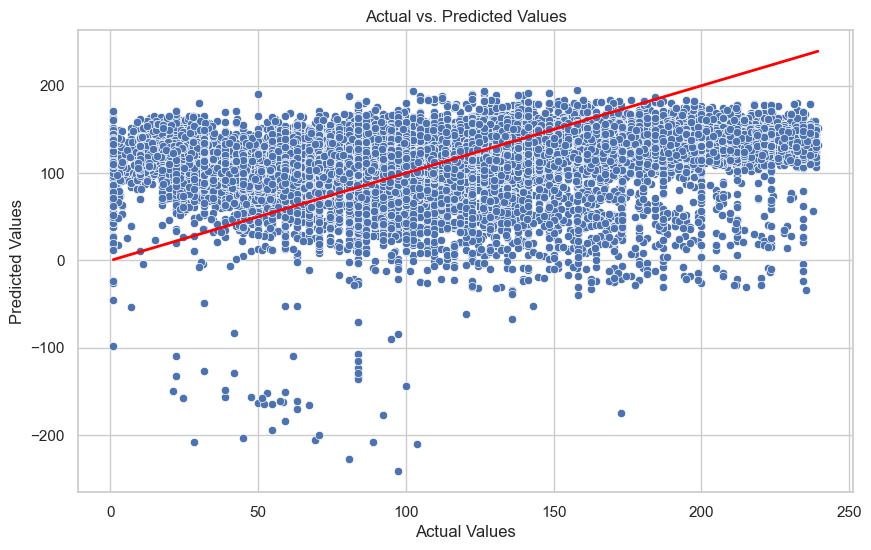

<Figure size 640x480 with 0 Axes>

In [359]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df_sqrt2)
plt.plot([actual_vs_predicted_df_sqrt2['Actual'].min(), actual_vs_predicted_df_sqrt2['Actual'].max()],
         [actual_vs_predicted_df_sqrt2['Actual'].min(), actual_vs_predicted_df_sqrt2['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
plt.savefig('images/ridgeRegression2.png')

# Similar observation with the model accuracy on the ridge regression

In [360]:
# SFS with Lasso Regression : 
sequential_pipe1 = Pipeline([('selector', SequentialFeatureSelector(Lasso(), 
                                                                  n_features_to_select=4)),
                           ('linreg', LinearRegression())])
sequential_pipe1.fit(X1_train, y1_train)
sequential_train_pred1 = sequential_pipe1.predict(X1_train)
sequential_test_pred1 = sequential_pipe1.predict(X1_test)
sequential_train_mse1 = mean_squared_error(y1_train, sequential_train_pred1)
sequential_test_mse1 = mean_squared_error(y1_test, sequential_test_pred1 )


print(f'Train MSE: {sequential_train_mse1}')
print(f'Test MSE: {sequential_test_mse1}')

Train MSE: 2024.9206511386035
Test MSE: 2029.9377043427603


In [361]:
lasso_coefs1 = sequential_pipe1.named_steps['linreg'].coef_

print(f'Coefficients: {lasso_coefs1}')

Coefficients: [ 1.73508547e+00 -2.46521000e-05  1.13326356e+01  1.55929019e+01]


In [362]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df_sqrt3 = pd.DataFrame({'Actual': y1_test, 'Predicted': sequential_test_pred1})
actual_vs_predicted_df_sqrt3.head()

Actual   Predicted
33513    70.703607  114.409532
149283  193.943291  122.111008
242958   83.636117  128.023163
158461  122.270193  122.318160
317616  167.032931  121.447155

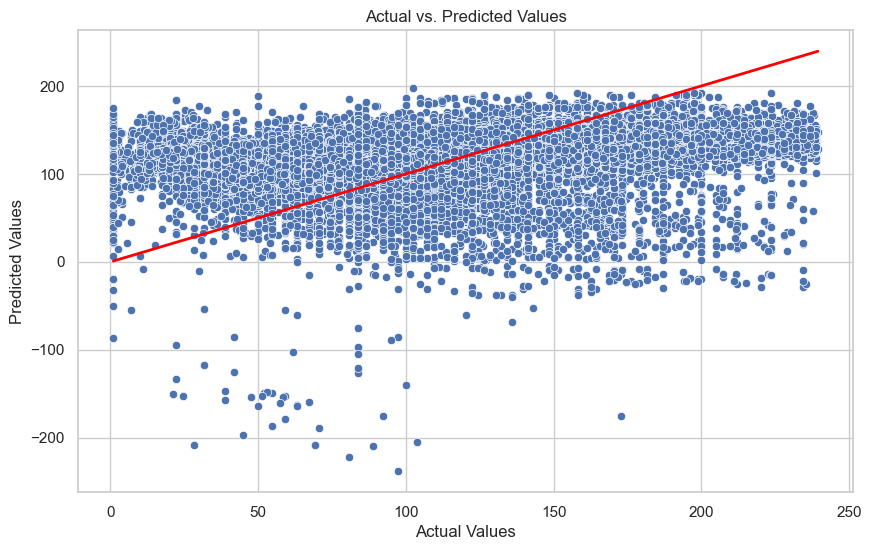

<Figure size 640x480 with 0 Axes>

In [363]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df_sqrt3)
plt.plot([actual_vs_predicted_df_sqrt3['Actual'].min(), actual_vs_predicted_df_sqrt3['Actual'].max()],
         [actual_vs_predicted_df_sqrt3['Actual'].min(), actual_vs_predicted_df_sqrt3['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
plt.savefig('images/SFS_Lasso2.png')

# When applied the SFS with LASSO with 4 features also did not improve the model accuracy, instead the mean was increased when compared to Linear and Ridge.

# As you see above the entire dataset is not giving us the accurracy in the muliple models tested , I would like to reduce the dataset

# Going back to data cleaning stage

# Based on the on the observations in the dataset , the car price is starting from 1.0 which in real world is not appropriate, so i will drop those rows and consider a basic threshold for the data for a car price as 5000 to 50000 and run the models again.

<center><h3>Data testing for the price column in the data set</center></h3>

In [364]:
data_price.sample(10)

price  year  odometer  condition_coder  manufacturer_coder  \
30715    5500.0  2008  163470.0              0.0                 9.0   
189556  12995.0  2011  174000.0              0.0                 1.0   
300290  26996.0  2015   39989.0              0.0                 0.0   
398227  36990.0  2015   51677.0              0.0                 2.0   
105725  34500.0  1959   69855.0              0.0                 0.0   
180188   3650.0  2003  250000.0              0.0                 3.0   
30438   23995.0  2020   16034.0              0.0                 5.0   
29866   30900.0  2017   39747.0              0.0                10.0   
366247  16500.0  2017   47307.0              0.0                 0.0   
77582    8599.0  2010  137133.0              0.0                 0.0   

        fuel_coder  transmission_coder  size_coder  type_coder  
30715          0.0                 0.0         2.0         0.0  
189556         0.0                 0.0         1.0         0.0  
300290         0.0                 0.0         1.0         0.0  
398227         1.0                 1.0         1.0         3.0  
105725         0.0                 2.0         1.0        11.0  
180188         0.0                 0.0         3.0         5.0  
30438          0.0                 0.0         1.0         0.0  
29866          0.0                 0.0         1.0        10.0  
366247         1.0                 1.0         1.0         0.0  
77582          0.0                 0.0         1.0         5.0

In [365]:
data_price.isnull().sum()

price                 0
year                  0
odometer              0
condition_coder       0
manufacturer_coder    0
fuel_coder            0
transmission_coder    0
size_coder            0
type_coder            0
dtype: int64

In [366]:
threshold = 50000

#filter out prices above the threshold 
data_price = data_price[data_price['price'] <= threshold]

print(data_price.sample(10))
print(data_price.info())

          price  year  odometer  condition_coder  manufacturer_coder  \
311885   1990.0  1990  386000.0              0.0                 3.0   
291189  33900.0  2018   27019.0              3.0                23.0   
204231  11775.0  2016  118650.0              0.0                10.0   
150914  28590.0  2020    2255.0              0.0                21.0   
400798  10995.0  2012  141979.0              0.0                 0.0   
375943  22497.0  2017   51572.0              0.0                 0.0   
394301   6995.0  2015   89820.0              0.0                 4.0   
22226   45995.0  2017   87722.0              0.0                 0.0   
244007   6995.0  2017   64777.0              0.0                 6.0   
111381   6995.0  2021  100000.0              0.0                 0.0   

        fuel_coder  transmission_coder  size_coder  type_coder  
311885         0.0                 2.0         1.0         5.0  
291189         0.0                 0.0         2.0         5.0  
204231      

In [367]:
#filter out the prices below 5k
data_price = data_price[(data_price['price'] <= threshold) & (data_price['price'] > 5000)]
data_price.sample(10)

price  year  odometer  condition_coder  manufacturer_coder  \
205660  13995.0  2010  162269.0              0.0                 0.0   
212409  33499.0  2017  101502.0              1.0                 2.0   
62572   27995.0  2013   82730.0              1.0                 4.0   
4407    28620.0  2019   37499.0              0.0                 6.0   
95562   30590.0  2017   34415.0              0.0                17.0   
238995   6950.0  2016  199020.0              1.0                 0.0   
86334    9995.0  2011  163000.0              0.0                 8.0   
257622   6900.0  2008  140598.0              0.0                 1.0   
263210  18677.0  2015   81323.0              0.0                 6.0   
52490   11888.0  2014  105974.0              0.0                 9.0   

        fuel_coder  transmission_coder  size_coder  type_coder  
205660         0.0                 0.0         1.0         0.0  
212409         0.0                 0.0         1.0         2.0  
62572          0.0                 0.0         1.0         5.0  
4407           0.0                 0.0         1.0         1.0  
95562          0.0                 1.0         1.0         4.0  
238995         0.0                 0.0         1.0         0.0  
86334          0.0                 0.0         1.0         0.0  
257622         0.0                 0.0         1.0         5.0  
263210         0.0                 0.0         1.0         3.0  
52490          4.0                 0.0         1.0         6.0

In [368]:
# Calculate skewness
price_skew = data_price['price'].skew()

C:\Users\pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


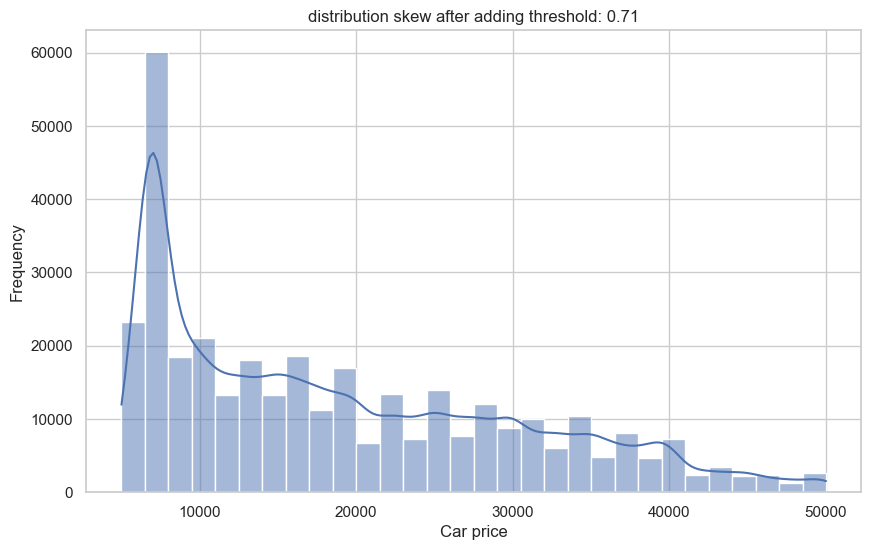

<Figure size 640x480 with 0 Axes>

In [369]:
plt.figure(figsize=(10, 6))
sns.histplot(data_price['price'],bins=30,kde=True)
plt.title(f'distribution skew after adding threshold: {price_skew:.2f}')
plt.xlabel('Car price')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/data_priceafter_threshold.png')

In [370]:
X_filtered = data_price.drop('price', axis = 1)
y_filtered = data_price['price']

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, random_state = 42)

In [372]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

In [373]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 10424.0805, R2 = 0.1647
Ridge Regression: RMSE = 10424.0806, R2 = 0.1647
Lasso Regression: RMSE = 10424.0990, R2 = 0.1647


<h2> Linear regression is slightly better in perfomrance when compared to ridge and Lasso because it has the lowest RMSE and no difference in the R2 score.</h2>

**RMSE 10424.0805** indicates average error in the prediction. Tn this context, it means that the predictaions are off by by about 10424 units then the actual values of the car prices sales.

**R2 (R-squared) = 0.1647**: This value indicates that approximately 16.47% of the variance in the target variable (car sales ) is explained by the features in the model. While this is a low level of explanation, it also indicates that there is still a significant amount of unexplained variance, suggesting room for model improvement.

# Cross Validation and Hyperparameter Tuning

In [374]:
# Define the parameter grid for Ridge,and Lasso
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]}  
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 10407.2946
Best Ridge: {'alpha': 0.1}, RMSE = 10407.3220
Best Lasso: {'alpha': 0.01}, RMSE = 10407.3220

Evaluate the best models on the test set
Linear Regression: RMSE = 10424.0805, R2 = 0.1647
Ridge: RMSE = 10424.0805, R2 = 0.1647
Lasso: RMSE = 10424.0807, R2 = 0.1647


The performance remains unchanged as expected since Linear Regression does not have hyperparameters to tune. It serves as a baseline for comparison.

Based on the post-tuning metrics, there no much difference in Ridge and Lasso performing model, however i will consider Ridge model as it has a difference in the RSME making it the preferred choice for predicting car prices in this context.

# Ridge model - Final performance metrics and model interpretation
# Given the results of the previous section, we'll proceed with the best Ridge model for further analysis.

# Ridge Regression has the best performance after GridSearchCV among all the models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics.

# Also i still think there is room for improvement in the model as it is not the accurate.

**RMSE (Root Mean Squared Error) = 10424.0805**: This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 10424.0805 units from the actual values of car prices which is not at all good.

**R2 (R-squared) = 0.1647**: This value indicates that approximately 16.47% of the variance in the target variable (car prices ) is explained by the features in the model. 

In [375]:
# Use the best Ridge model to make predictions
best_ridge_model = best_models['Ridge']
y_pred = best_ridge_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_ridge.head()

Actual     Predicted
312861  18995.0  15913.746160
75440   16500.0  17331.717510
312625  10995.0  13083.212420
306058   5199.0  17909.962101
384527  32990.0  26628.432677

# Interpret the Coefficients and Y-Intercept

Ridge regression provides the coefficients of the features and the intercept. These values help us understand the relationship between each feature and the target variable.Some coefficients are zero, indicating that the feature is not used in the model.

In [376]:
# Get the coefficients and the intercept from the best Ridge model
coefficients = pd.Series(best_ridge_model.coef_, index=X_train.columns)
intercept = best_ridge_model.intercept_

print("Ridge Regression Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

Ridge Regression Coefficients:
year                   344.342909
odometer                -0.009302
condition_coder       -705.156002
manufacturer_coder    -126.038698
fuel_coder            2171.070443
transmission_coder    4109.751303
size_coder            -587.209703
type_coder             -35.835222
dtype: float64

Intercept: -672717.9457309105


**Coefficient Value:** The value of each coefficient represents the expected change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.

**Intercept:** The intercept represents the expected value of the target variable when all features are zero.

# Plot the results

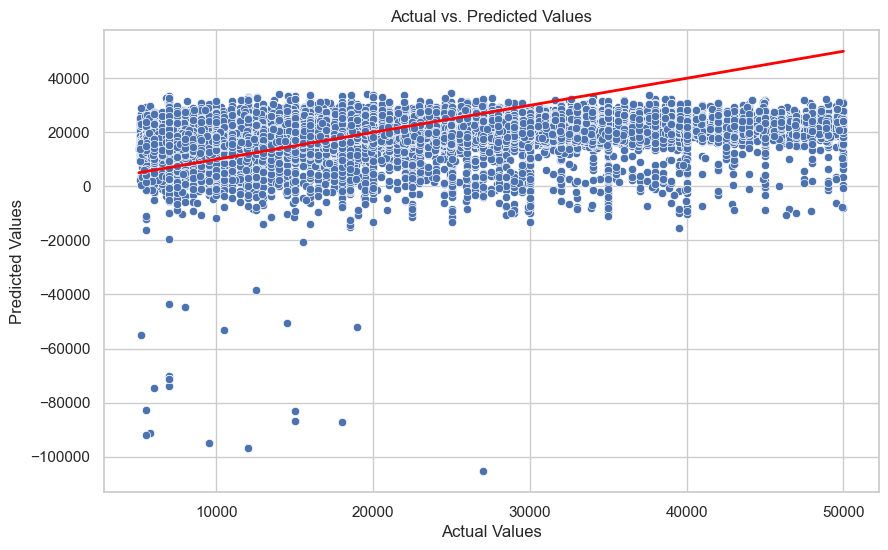

<Figure size 640x480 with 0 Axes>

In [377]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_ridge)
plt.plot([actual_vs_predicted_ridge['Actual'].min(), actual_vs_predicted_ridge['Actual'].max()],
         [actual_vs_predicted_ridge['Actual'].min(), actual_vs_predicted_ridge['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
plt.savefig('images/ridge_model.png')

|  | Overfitting | Underfitting 
| :- | -: | :-: |
| <b>Train Set</b> | Low Accuracy | High Accuracy |
| <b>Test Set</b> | Low Accuracy | High Accuracy |

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# Specific Interpretation for the Vehicles Dataset

**year: 344.342909** - For a unit increase in the year variable, the expected change in the target variable (car price ) is a increase of 344.342909 units. This suggests that year has a significant positive role on the car price expense less or more. In the context of this dataset, this might mean that every new year the car price will increase , however car price may still needs other factors to chnage in this price.

**odometer: -0.009302** - This coefficient is  zero, indicating that it does not contribute to the model. Ridge has excluded these features, suggesting it is not important for predicting car prices in this dataset.

**condition_coder: -705.156002** - For a unit increase in the condition variable, the expected change in the target variable (car price) is a decrease of 705.156002 units. This suggests that condition has a significant negative impact on car price prediction. In the context of this dataset, this might mean that the lower the car condition the price is decreased.

**manufacturer_coder: -126.038698** - For a unit increase in the manufactuer variable, the expected change in the target variable (car price ) is a decrease of 126.038698 units. This suggests that manufacturer has a significant negative role on the car price expense less or more. In the context of this dataset, this might mean this coefficient may not present us with correct value , as the manufacturer and codes given in the dataset may not be associated correctly. We may have to revisit this coulm for better performance.

**fuel_coder: 2171.070443** - For a unit increase in the fuel variable, the expected change in the target variable (car price ) is a increase of 2171.070443 units. This suggests that fuel has a strong positive role on the car price expense less or more. In the context of this dataset, this might mean that  having the fuel (gas, electric or hybrid) has a heavy impact on the car price increase or decrease

**transmission_coder: 4109.751303** - For a unit increase in the transmission variable, the expected change in the target variable (car price ) is a increase of 4109.751303 units. This suggests that transmission has a strong positive role on the car price expense less or more. In the context of this dataset, this might mean that having a (automatic or manual) transmission will impact the car price  increase or decrease.

**size_coder: -587.209703** - For a unit increase in the size variable, the expected change in the target variable (car price ) is a decrease of 587.209703 units. This suggests that size has a significant negative role on the car price expense less or more. In the context of this dataset, this might mean that size cannot be a good factor to recommend for predictions of the car price.

**type_coder: -35.835222** - For a unit increase in the type variable, the expected change in the target variable (car price ) is a decrease of 35.835222 units. This suggests that year has a significant negative role on the car price expense less or more. In the context of this dataset, this might mean that the type of a vehicle may not be a major factor in predicting the car price. 

# After looking at the above Coefficients , i think that using one hot encoding instead of ordinal encoding can give better results in handling the categorical columns

<h1><center>Conclusions</center></h1>

<h3>Business Understanding Recap</h3>

In real world identifying the right car with a budget is a huge decision, So identifying right factors that can help make a desicion for the car prices high or low is the goal. This can be achieved by taking the given dataset, building and evaluating different regerssion models and find the factors/features that will impact the car price to increase or decrease.

# Interesting Findings

| Feature |Recommendation | Coefficient Value | Impact | Interpretation 
| :- | -: | -: | -: | :-: |
| year | <center>Buyer can analyze his requirement before purcahing his car this way he will not end up paying more and can plan new cars again</center> | 344.342909 | Significant positive  | Each year the car price has a increase based on the demand and supply of the market
| odometer | <center> No specific recommendation needed based on this feature.</center> | -0.009302 | None | odometer does not contribute to predicting car prices 
| condition | <center>Buyer has to make sure before he purches the car evalute the condition of the car </center>| -705.156002 | Strong negative | As the condition of the car depreciates the price will decrease which can help us predict the price of the cars.
| manufacturer | <center> Buyer needs to think properly he requirement to buy his car and choose the manufacturer </center> | -126.038698 | Significant negative | Manufacturer does have a negative value , however it does matter hat manufacturer tha car is for the price toincrease or decrease
| fuel | <center>Buyer has to aware of the different types of fuel and its prices and study the market for next few years before he plans to chooase the car</center> | 2171.070443 | Strong positive | Having a electric or gas car will definately have an impct on the car price sales.
| transmission | <center> Buyer needs to completely knowing his reason to buy the car and expereince with the transmission so he can buy the correct car.</center> | 4109.751303 | Strong positive  | having a automatic or manual car will also impact the car price sales.
| size | <center> Buyer can make a desicion based on the other factors if this is ok to comprise which can help the car price low or high </center> | -587.209703 | Strong negative | Size may not be a big factor that impacts the price of a car , however it shows a negative value which means the model needs to be improved.
| type | <center> Buyer of diffrent fileds have different needs to buy the car  example constructor workers may need a truck , where office works are fine with sedan. User requirements can help make this decision </center> | -35.835222 | Significant negative | Type will also impact the car price , which means we can improve our model to have better coeffients value.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.